In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300
sns.set_theme(context='paper', style='whitegrid', palette='deep')

Start here

In [2]:
mytypes = {'chr':'string', 'pos':'Int64', 'ref':'string', 'alt':'string', 'consequence':'string', 'gene':'string', 'cadd':'float64', 'revel': 'float64', 'genotype':'string', 'clinvar':'string', 'ref_allele_gnomad':'string', 'alt_allele_gnomad':'string', 'alt_freq_gnomad':'float64', 'ref_allele_1000':'string', 'alt_allele_1000':'string', 'alt_freq_1000g':'float64'}

df = pd.read_csv('/home/ihenarejos/workspace/projects/pof/results/23_burden_data/opencga_variants_combined.tsv', sep="\t",  na_values=['.', 'NA', '-'], dtype=mytypes)


In [20]:
df.describe()

,pos,cadd,revel,alt_freq_gnomad,alt_freq_1000g
count,8.645500e+04,81276.000000,76849.000000,67679.000000,44583.000000
mean,7.245391e+07,15.150438,0.169220,0.114831,0.103552
std,5.768741e+07,9.729610,0.188466,0.215679,0.177377
min,1.481100e+04,0.000000,0.000000,0.000072,0.000885
25%,2.844872e+07,6.300000,0.041000,0.001509,0.002655
50%,5.599439e+07,16.680000,0.099000,0.012213,0.015044
75%,1.088108e+08,23.200001,0.225000,0.106368,0.112389
max,2.489182e+08,60.000000,0.996000,1.000000,0.738053


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86455 entries, 0 to 86454
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   chr                86455 non-null  string 
 1   pos                86455 non-null  Int64  
 2   ref                84196 non-null  string 
 3   alt                83535 non-null  string 
 4   consequence        86159 non-null  string 
 5   gene               86159 non-null  string 
 6   cadd               81276 non-null  float64
 7   revel              76849 non-null  float64
 8   genotype           86455 non-null  string 
 9   clinvar            16739 non-null  string 
 10  ref_allele_gnomad  66051 non-null  string 
 11  alt_allele_gnomad  65538 non-null  string 
 12  alt_freq_gnomad    67679 non-null  float64
 13  ref_allele_1000g   44293 non-null  object 
 14  alt_allele_1000g   44071 non-null  object 
 15  alt_freq_1000g     44583 non-null  float64
dtypes: Int64(1), float64(4

In [22]:
df.head()

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,ref_allele_gnomad,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g
0,1,953279,T,C,missense_variant,NOC2L,3.89,0.127,1/1,<NA>,T,C,0.935254,T,C,0.701770
1,1,973858,G,C,missense_variant,PLEKHN1,9.26,0.042,0/1,<NA>,G,C,0.643125,G,C,0.464602
2,1,1051352,G,A,missense_variant,AGRN,5.92,0.069,0/1,<NA>,G,A,0.006268,G,A,0.002655
3,1,1071842,G,T,missense_variant,RNF223,20.60,0.182,0/1,<NA>,G,T,0.132834,NaN,NaN,NaN
4,1,1072052,G,A,missense_variant,RNF223,0.01,0.132,0/1,<NA>,G,A,0.490135,G,A,0.425664


In [23]:
df['consequence'].value_counts()

missense_variant                                               75206
frameshift_variant                                              1865
stop_gained                                                     1392
3_prime_UTR_variant                                             1319
inframe_deletion                                                1234
                                                               ...  
3_prime_UTR_variant,start_lost                                     1
5_prime_UTR_variant,5_prime_UTR_variant,5_prime_UTR_variant        1
3_prime_UTR_variant,stop_lost                                      1
missense_variant,stop_gained                                       1
missense_variant,3_prime_UTR_variant,3_prime_UTR_variant           1
Name: consequence, Length: 73, dtype: Int64

In [24]:
df['consequence'] = df['consequence'].str.split(",")
df['consequence']


0        [missense_variant]
1        [missense_variant]
2        [missense_variant]
3        [missense_variant]
4        [missense_variant]
                ...        
86450    [missense_variant]
86451    [missense_variant]
86452    [missense_variant]
86453    [missense_variant]
86454    [missense_variant]
Name: consequence, Length: 86455, dtype: object

In [25]:
df2 = df.copy()

In [26]:
df2 = df2.explode('consequence')
df2['consequence'].value_counts()

missense_variant           77240
3_prime_UTR_variant         2151
frameshift_variant          1914
stop_gained                 1442
5_prime_UTR_variant         1416
inframe_deletion            1283
inframe_insertion           1197
splice_donor_variant         443
splice_acceptor_variant      400
start_lost                   268
stop_lost                    138
Name: consequence, dtype: int64

In [27]:
# filter by maf

def calculate_maf(af) -> pd.Series:
    if af < 0.5:
        maf = af
    else: 
        maf = abs(1 - af)

    return maf

df2.apply(
    lambda row: calculate_maf(row['alt_freq_gnomad']),
    axis=1
)



0        0.064746
1        0.356875
2        0.006268
3        0.132834
4        0.490135
           ...   
86450    0.002945
86451         NaN
86452         NaN
86453    0.001084
86454    0.123932
Length: 88188, dtype: float64

In [28]:
df2['maf_gnomad'] = df2.apply(
    lambda row: calculate_maf(row['alt_freq_gnomad']),
    axis=1
)

df2['maf_1000g'] = df2.apply(
    lambda row: calculate_maf(row['alt_freq_1000g']),
    axis=1
)
df2.head()

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,ref_allele_gnomad,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g
0,1,953279,T,C,missense_variant,NOC2L,3.89,0.127,1/1,<NA>,T,C,0.935254,T,C,0.701770,0.064746,0.298230
1,1,973858,G,C,missense_variant,PLEKHN1,9.26,0.042,0/1,<NA>,G,C,0.643125,G,C,0.464602,0.356875,0.464602
2,1,1051352,G,A,missense_variant,AGRN,5.92,0.069,0/1,<NA>,G,A,0.006268,G,A,0.002655,0.006268,0.002655
3,1,1071842,G,T,missense_variant,RNF223,20.60,0.182,0/1,<NA>,G,T,0.132834,NaN,NaN,NaN,0.132834,NaN
4,1,1072052,G,A,missense_variant,RNF223,0.01,0.132,0/1,<NA>,G,A,0.490135,G,A,0.425664,0.490135,0.425664


In [29]:
# check if alt allele is different in databases
(
    df2['ref'].dropna().equals(df2['ref_allele_gnomad'].dropna()) 
)

False

In [30]:
# there's discrepancy between opencga and v38 IDs, mainly due to indels
df2['ref'][~df2['ref'].isin(df2['ref_allele_gnomad'].dropna())].values

<StringArray>
[             <NA>,              <NA>,              <NA>,              <NA>,
              <NA>,              <NA>,              <NA>,              <NA>,
              <NA>,              <NA>,
 ...
           'CAGCC',              <NA>,            'AAAC',              <NA>,
 'GGCAGCTTGAGCAGC', 'GGCAGCTTGAGCAGC',              <NA>,              <NA>,
              <NA>,              <NA>]
Length: 2539, dtype: string

In [31]:
# filter by nonsense so
nonsense_so = ["transcript_ablation","splice_acceptor_variant","splice_donor_variant","stop_gained", "frameshift_variant","stop_lost", "start_lost", "transcript_amplification"]

nonsense_filter = (
    (df2['consequence'].isin(nonsense_so))
)
nonsense_filter.value_counts()

False    83583
True      4605
Name: consequence, dtype: int64

### Data exploration

Let's fill variants absent in the databases with a high value like 2.

In [32]:
df2['maf_1000g'] = df2['maf_1000g'].fillna(2)
df2['maf_gnomad'] = df2['maf_gnomad'].fillna(2)

In [33]:
# presence with maf <.5 or absence 
maf_filter =(
    ((df2['maf_gnomad'] <.5 ) & (df2['maf_1000g'] <.5)) | ((df2['maf_gnomad'] == 2) & (df2['maf_1000g'] == 2))
)
maf_filter.value_counts()

True     62962
False    25226
dtype: int64

Lets analyze variants that fullfil maf condition

In [34]:
def visualize_maf(*maf: float, threshold=.5) -> pd.Series:
    
    if all(i <.5 for i in maf):
        return f'maf < {threshold}'
    elif all(i == 2 for i in maf):
        return 'absent'
    else: 
        return f'maf > {threshold}'

In [35]:
df2['maf_analysis'] = df2.apply(
    lambda row: visualize_maf(row['maf_gnomad'], row['maf_1000g']), axis=1
)
df2['maf_analysis'].value_counts()

maf < 0.5    44659
maf > 0.5    25226
absent       18303
Name: maf_analysis, dtype: int64

So ensemble summary

In [36]:
# facilitate data exploration with a new column
def so_consequences_summarized(consequence: str) -> pd.Series:
    if not pd.isna(consequence):
        if consequence in ["transcript_ablation","splice_acceptor_variant","splice_donor_variant","stop_gained", "frameshift_variant","stop_lost", "start_lost", "transcript_amplification"]:
            return 'nonsense'
        
        elif consequence == 'missense_variant':
            return 'missense'
        
        else:
            return 'UTR, inframe indels'
        
df2.apply(
    lambda row: so_consequences_summarized(row['consequence']),
    axis=1
)

df2['consequence_analysis'] = df2.apply(
    lambda row: so_consequences_summarized(row['consequence']),
    axis=1
)

df2['consequence_analysis'].value_counts()

missense               77240
UTR, inframe indels     6047
nonsense                4605
Name: consequence_analysis, dtype: int64

In [37]:
(
    df2[
    (df2['maf_analysis'] == 'maf < 0.5')]['consequence_analysis'].value_counts()
)

missense               40930
UTR, inframe indels     2415
nonsense                1243
Name: consequence_analysis, dtype: int64

In [38]:
df2['maf_gnomad'].describe()

count    88188.000000
mean         0.494945
std          0.801132
min          0.000000
25%          0.002944
50%          0.034713
75%          0.413352
max          2.000000
Name: maf_gnomad, dtype: float64

In [39]:
df2.to_csv('/home/ihenarejos/workspace/projects/pof/results//23_burden_data/df_variants_to_visualization.tsv', sep="\t")

### Plots

In [40]:
db = 'maf_gnomad'

toplot = df2[
        (df2[db] < 2) &
    (df2['maf_analysis'].isin(['maf < 0.5', 'absent']))
    ]
toplot.columns

Index(['chr', 'pos', 'ref', 'alt', 'consequence', 'gene', 'cadd', 'revel',
       'genotype', 'clinvar', 'ref_allele_gnomad', 'alt_allele_gnomad',
       'alt_freq_gnomad', 'ref_allele_1000g', 'alt_allele_1000g',
       'alt_freq_1000g', 'maf_gnomad', 'maf_1000g', 'maf_analysis',
       'consequence_analysis'],
      dtype='object')

In [41]:
toplot['consequence_analysis'].value_counts().to_csv(f'~/workspace/projects/pof/plots/{db}_dist.tsv', sep="\t")

In [42]:
mpl.rcParams['figure.dpi'] = 300
sns.set_theme(context='talk', style='whitegrid', palette='deep')

db = 'maf_gnomad'  # maf_1000g, gnomad
db_n = " ".join(db.split("_")[::-1]).upper()

g = sns.catplot(
    data=df2[
        (df2[db] < 2) &
    (df2['maf_analysis'].isin(['maf < 0.5', 'absent']))
    ],
    x='maf_analysis',
    y=db,
    kind='box',
    hue='consequence_analysis',
    palette=["goldenrod", "salmon", "firebrick"],
    legend=True
)

g.fig.suptitle(
    f'Distribution of {db_n}\nby variant consequence', y=1.1
)
legend= g._legend
legend.set_title('Consequence type')

for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel(f'{db_n}')
    ax.set_ylabel
    ax.yaxis.labelpad = 20
    ax.set_xticklabels('')
    # ax.set_ylim(0, 1)
    # ax.legend(title='Consequence type', bbox_to_anchor=(1,1))


# g
# plt.savefig('gnomad_dist')

Error in callback <function flush_figures at 0x7f12c4343f70> (for post_execute):


KeyboardInterrupt: 

Let's visualize variant consequences, predictors scores

In [ ]:
sorted_consequences = pd.Series({i: [idx] for idx, i in enumerate(sorted(df2['consequence'].dropna().unique().tolist())) if i != 'missense_variant'}).index
sorted_consequences

Index(['3_prime_UTR_variant', '5_prime_UTR_variant', 'frameshift_variant',
       'inframe_deletion', 'inframe_insertion', 'splice_acceptor_variant',
       'splice_donor_variant', 'start_lost', 'stop_gained', 'stop_lost'],
      dtype='object')

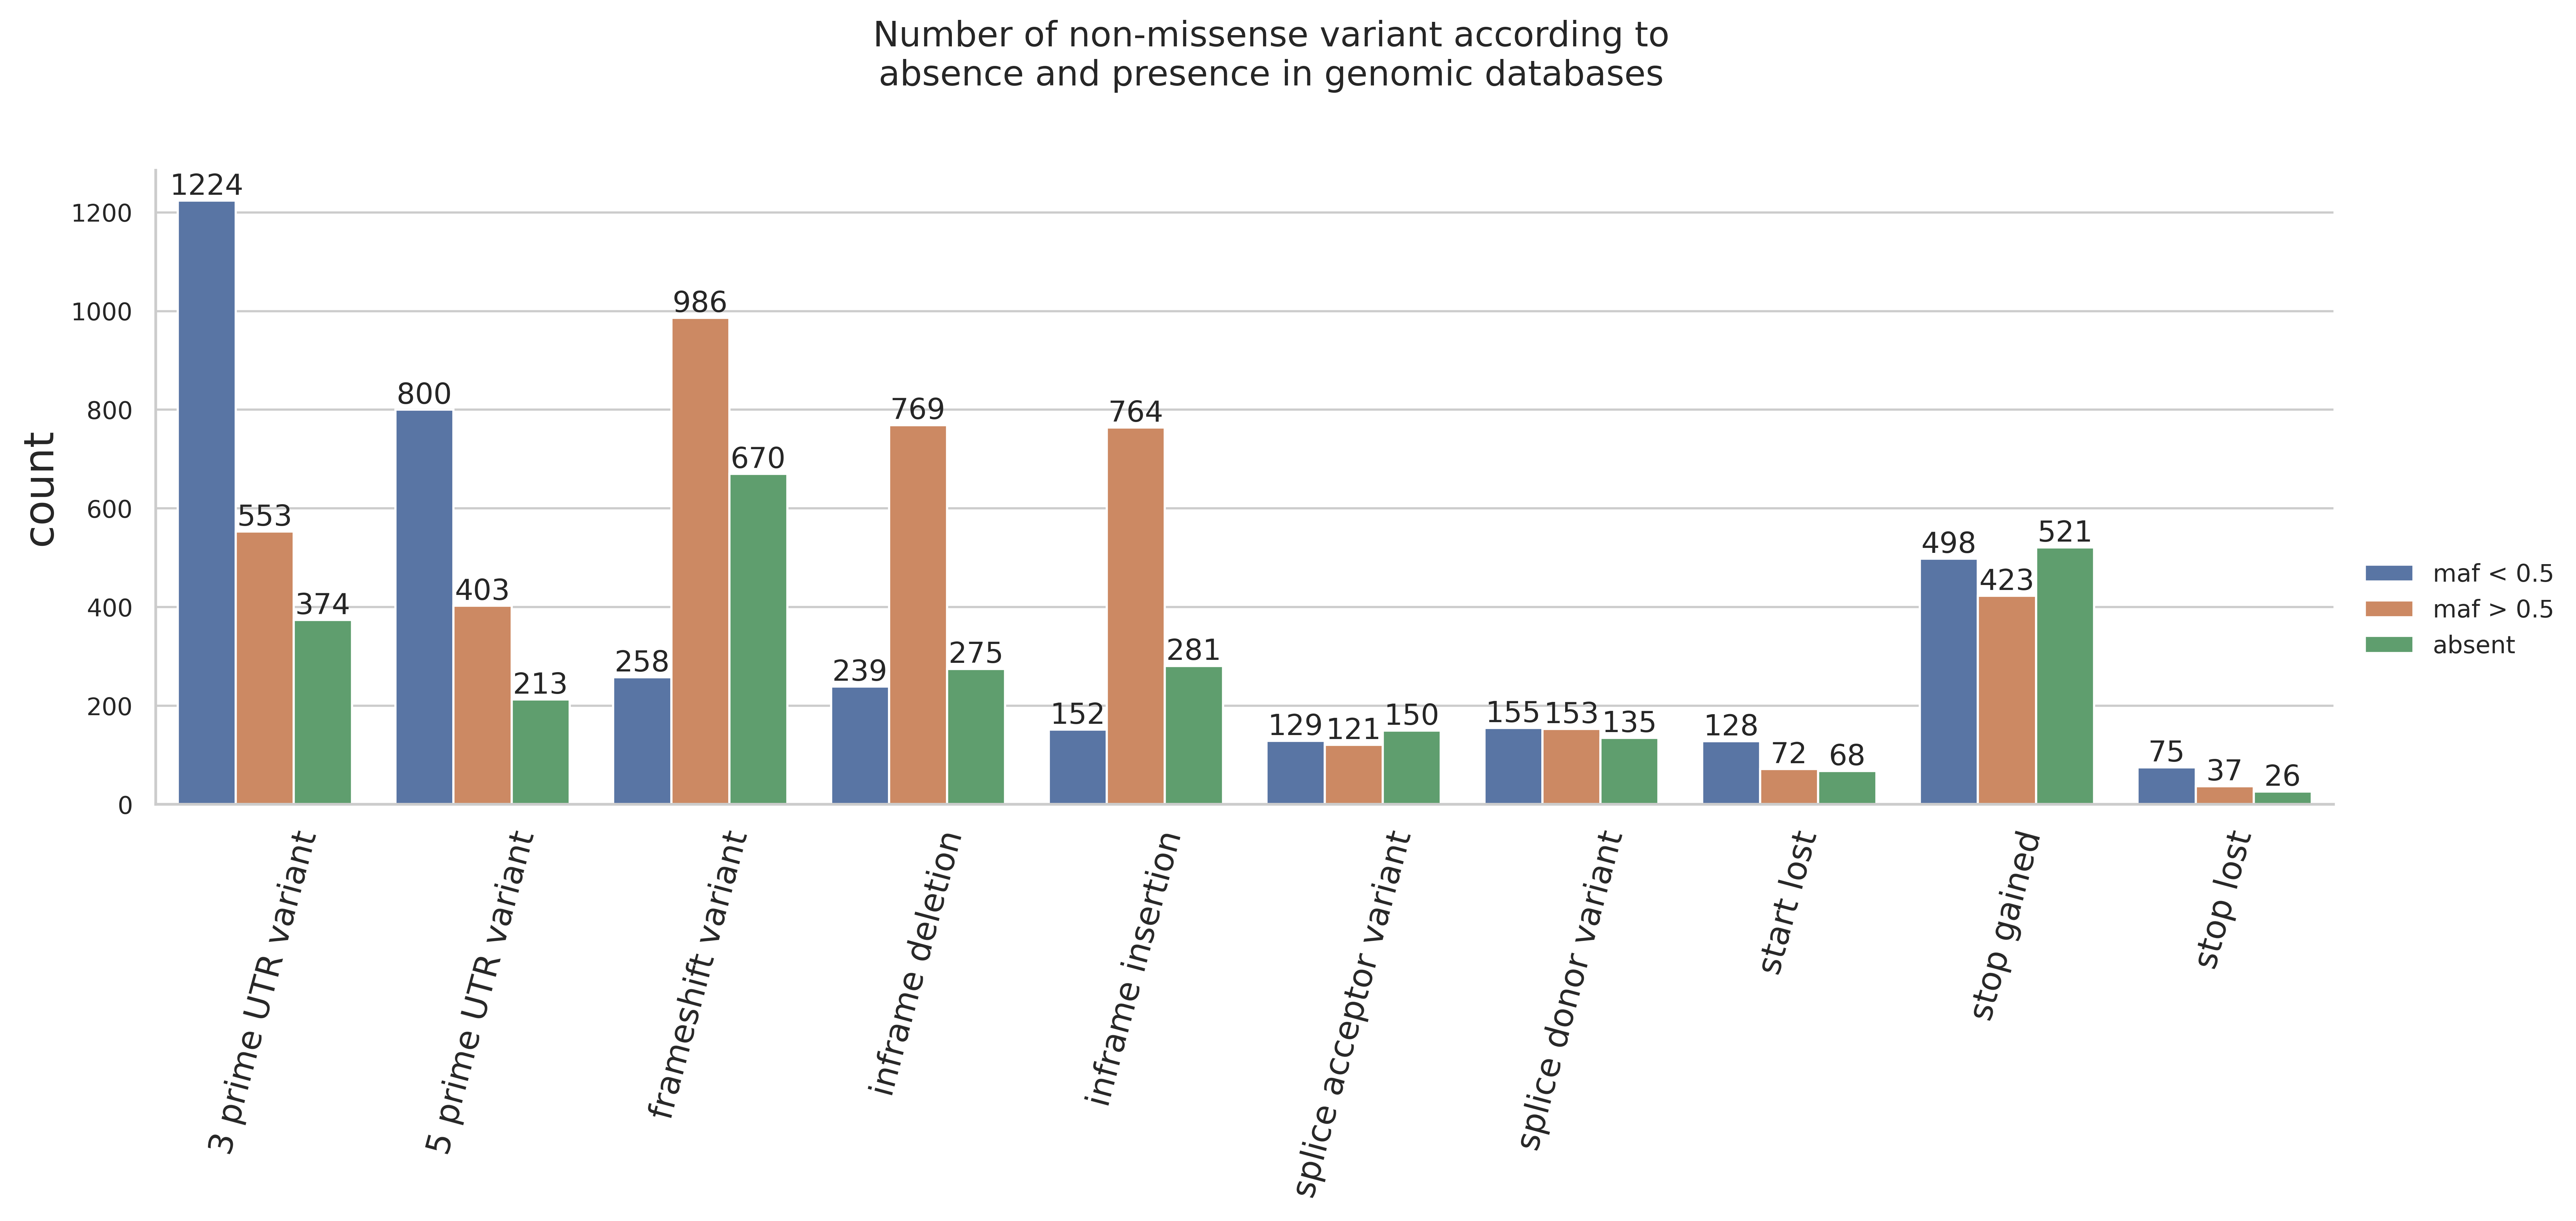

In [ ]:
mpl.rcParams['figure.dpi'] = 600
sns.set_theme(context='talk', style='whitegrid', palette='deep')
sns.set_context("paper", rc={"font.size":10.5,"axes.titlesize":20,"axes.labelsize":15}) 

toplot = df2[~df2
             ['consequence'].isin(['missense_variant'])
             ]

g = sns.catplot(
    data=toplot,
    x='consequence',
    # col='consequence',
    # col_wrap=3,
    height=4,  # 3, 1.5 for 1 object; 4, 3 for multiple
    aspect=3, 
    # s=10
    kind='count',
    hue = 'maf_analysis',
    order=sorted_consequences
)

g.fig.suptitle('Number of non-missense variant according to\nabsence and presence in genomic databases', y=1.15)

g._legend.set_title('')

for ax in g.axes.flat:
    ax.set_xlabel('', y=-1.05)
    ax.set_xticklabels([i.replace("_", ' ') for idx, i in enumerate(sorted_consequences)], rotation=75, fontdict={'fontsize':12})
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontdict={'fontsize':12})

ax = g.axes[0, 0]
for container in ax.containers:
    ax.bar_label(container)

# plt.savefig('variant_1000g_consequence.png')

In [ ]:
from operator import itemgetter
deep_palette = (sns.color_palette('deep').as_hex())
deep_palette

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

                     counts
nonsense               1301
UTR, inframe indels     356


Text(0.5, 1.0, 'Distribution of cadd score for variants')

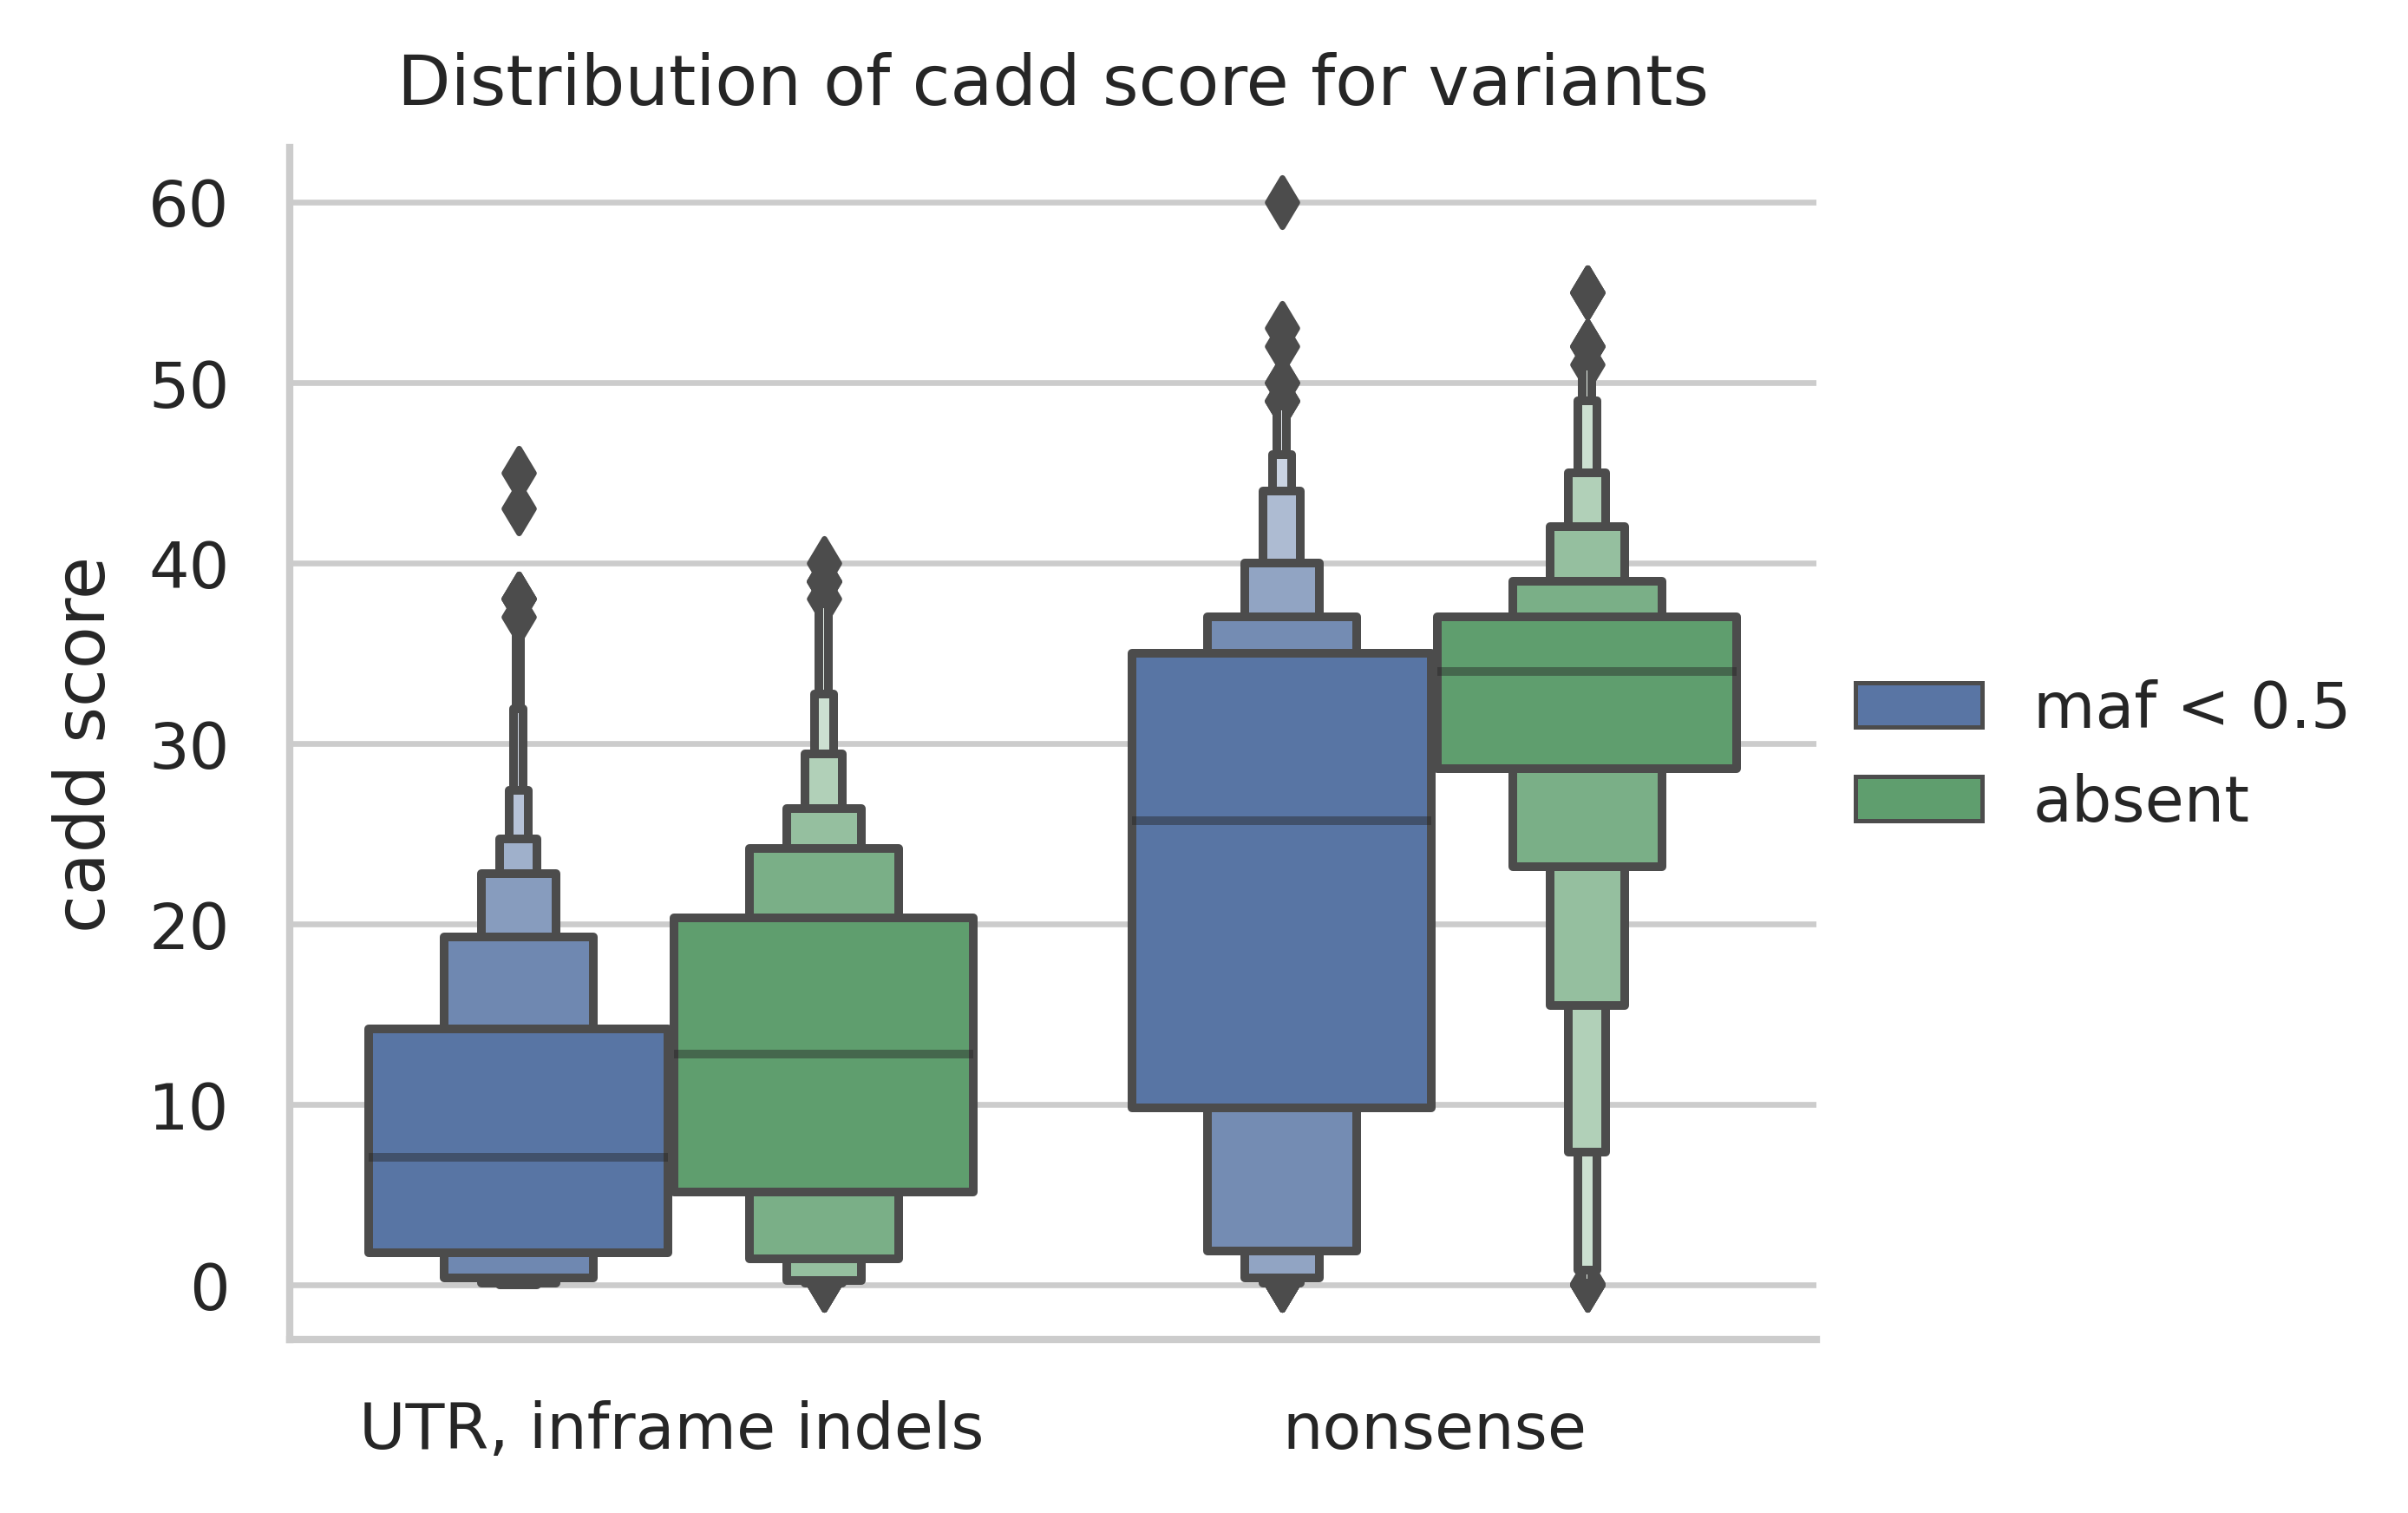

In [ ]:
# boxen plot cadd, revel
mpl.rcParams['figure.dpi'] = 600
sns.set_theme(context='paper', style='whitegrid', palette='deep')
# sns.set_context("paper", rc={"font.size":10.5,"axes.titlesize":20,"axes.labelsize":15}) 

cond =  'cadd'

if cond == 'revel':

    toplot = (
        df2[df2['consequence'].isin(['missense_variant']) &
            (~df2['maf_analysis'].isin(['maf > 0.5'])) # add/r absent
            ]
    )
    # my_palette = ['goldenrod']
    my_palette = itemgetter(0, 2)(deep_palette)
    
    # to filter according to predictor
    print(toplot[(toplot['revel'] > 0.75 )]['consequence_analysis']
    .value_counts().to_frame('counts')
    )
    
elif cond == 'cadd':
    
    toplot = (
        df2[~df2['consequence'].isin(['missense_variant']) &
            (~df2['maf_analysis'].isin(['maf > 0.5']))
            ]
    )
    # my_palette = ['salmon', 'firebrick']
    my_palette = itemgetter(0, 2)(deep_palette)

    print(toplot[(toplot['cadd'] > 20 )]['consequence_analysis']
    .value_counts().to_frame('counts')
    )

g = sns.catplot(
    data=toplot,
    x='consequence_analysis',
    y=cond,
    kind='boxen',
    hue='maf_analysis',
    palette=my_palette,
    aspect=1.25,
    height=3,
)
g._legend.set_title('')

for ax in g.axes.flat:
    ax.set_xlabel('', y=-1.05),
    ax.set_ylabel(f'{cond} score', x=-1.05)

plt.title(f'Distribution of {cond} score for variants')


### Generate dataframe after applying all filters

In [ ]:
def filter_maf_predictors(data: pd.DataFrame) -> pd.Series:
    '''
    Returns all variants that are either absent from genomic databases,
    present with maf <0.5 and with a high revel score if missense or high cadd score otherwise.
    '''
    return (
                    (
                    (data['revel'] >= 0.75) 
                    & 
                    (data['consequence'] == 'missense_variant')
                    &
                    (data['maf_analysis'].isin(['absent', 'maf < 0.5']))
                    ) 
                    |
                    ((data['cadd'] >= 20) 
                    & 
                    (data['consequence'] != 'missense_variant'))
                    &
                    (data['maf_analysis'].isin(['absent', 'maf < 0.5']))
    )
                    # for a less stricter filter, uncomment the following:
                    # |
                    # ((data['maf_analysis'] == 'absent'))
                    # )

In [ ]:
# second filter: predictors filter

predictors_filter = filter_maf_predictors(df2)

selection = df2[predictors_filter]
selection

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,ref_allele_gnomad,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis
188,1,19683088,G,T,stop_gained,TMCO4,36.000000,NaN,0/1,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense
436,1,66776404,G,A,splice_donor_variant,DYNLT5,33.000000,NaN,0/1,<NA>,G,A,0.117381,G,A,0.110619,0.117381,0.110619,maf < 0.5,nonsense
554,1,112619872,G,A,5_prime_UTR_variant,"CAPZA1,ST7L",24.299999,0.394,0/1,<NA>,G,A,0.012784,G,A,0.019469,0.012784,0.019469,maf < 0.5,"UTR, inframe indels"
584,1,116613963,G,A,stop_gained,IGSF3,38.000000,NaN,0/1,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense
650,1,150968149,T,G,missense_variant,CERS2,27.400000,0.776,0/1,<NA>,T,G,0.144419,T,G,0.130088,0.144419,0.130088,maf < 0.5,missense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense
86410,18,47136439,T,A,start_lost,HDHD2,26.299999,NaN,0/1,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense
86417,19,8112006,C,G,missense_variant,FBN3,24.600000,0.851,0/1,<NA>,C,G,0.010119,C,G,0.007965,0.010119,0.007965,maf < 0.5,missense
86441,20,63346836,T,C,missense_variant,CHRNA4,25.000000,0.845,0/1,C0271583;C1835905;C1854335,<NA>,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense


In [ ]:
selection['maf_analysis'].value_counts()

absent       1677
maf < 0.5    1318
Name: maf_analysis, dtype: int64

In [ ]:
# sorted_consequences = pd.Series({i: [idx] for idx, i in enumerate(sorted(selection['consequence'].dropna().unique().tolist())) if i == 'missense_variant'}).index
# sorted_consequences = pd.Series({i: [idx] for idx, i in enumerate(sorted(selection['consequence'].dropna().unique().tolist())) if i != 'missense_variant'}).index
sorted_consequences = pd.Series({i: [idx] for idx, i in enumerate(sorted(selection['consequence'].dropna().unique().tolist()))}).index
sorted_consequences

Index(['3_prime_UTR_variant', '5_prime_UTR_variant', 'missense_variant',
       'splice_acceptor_variant', 'splice_donor_variant', 'start_lost',
       'stop_gained', 'stop_lost'],
      dtype='object')

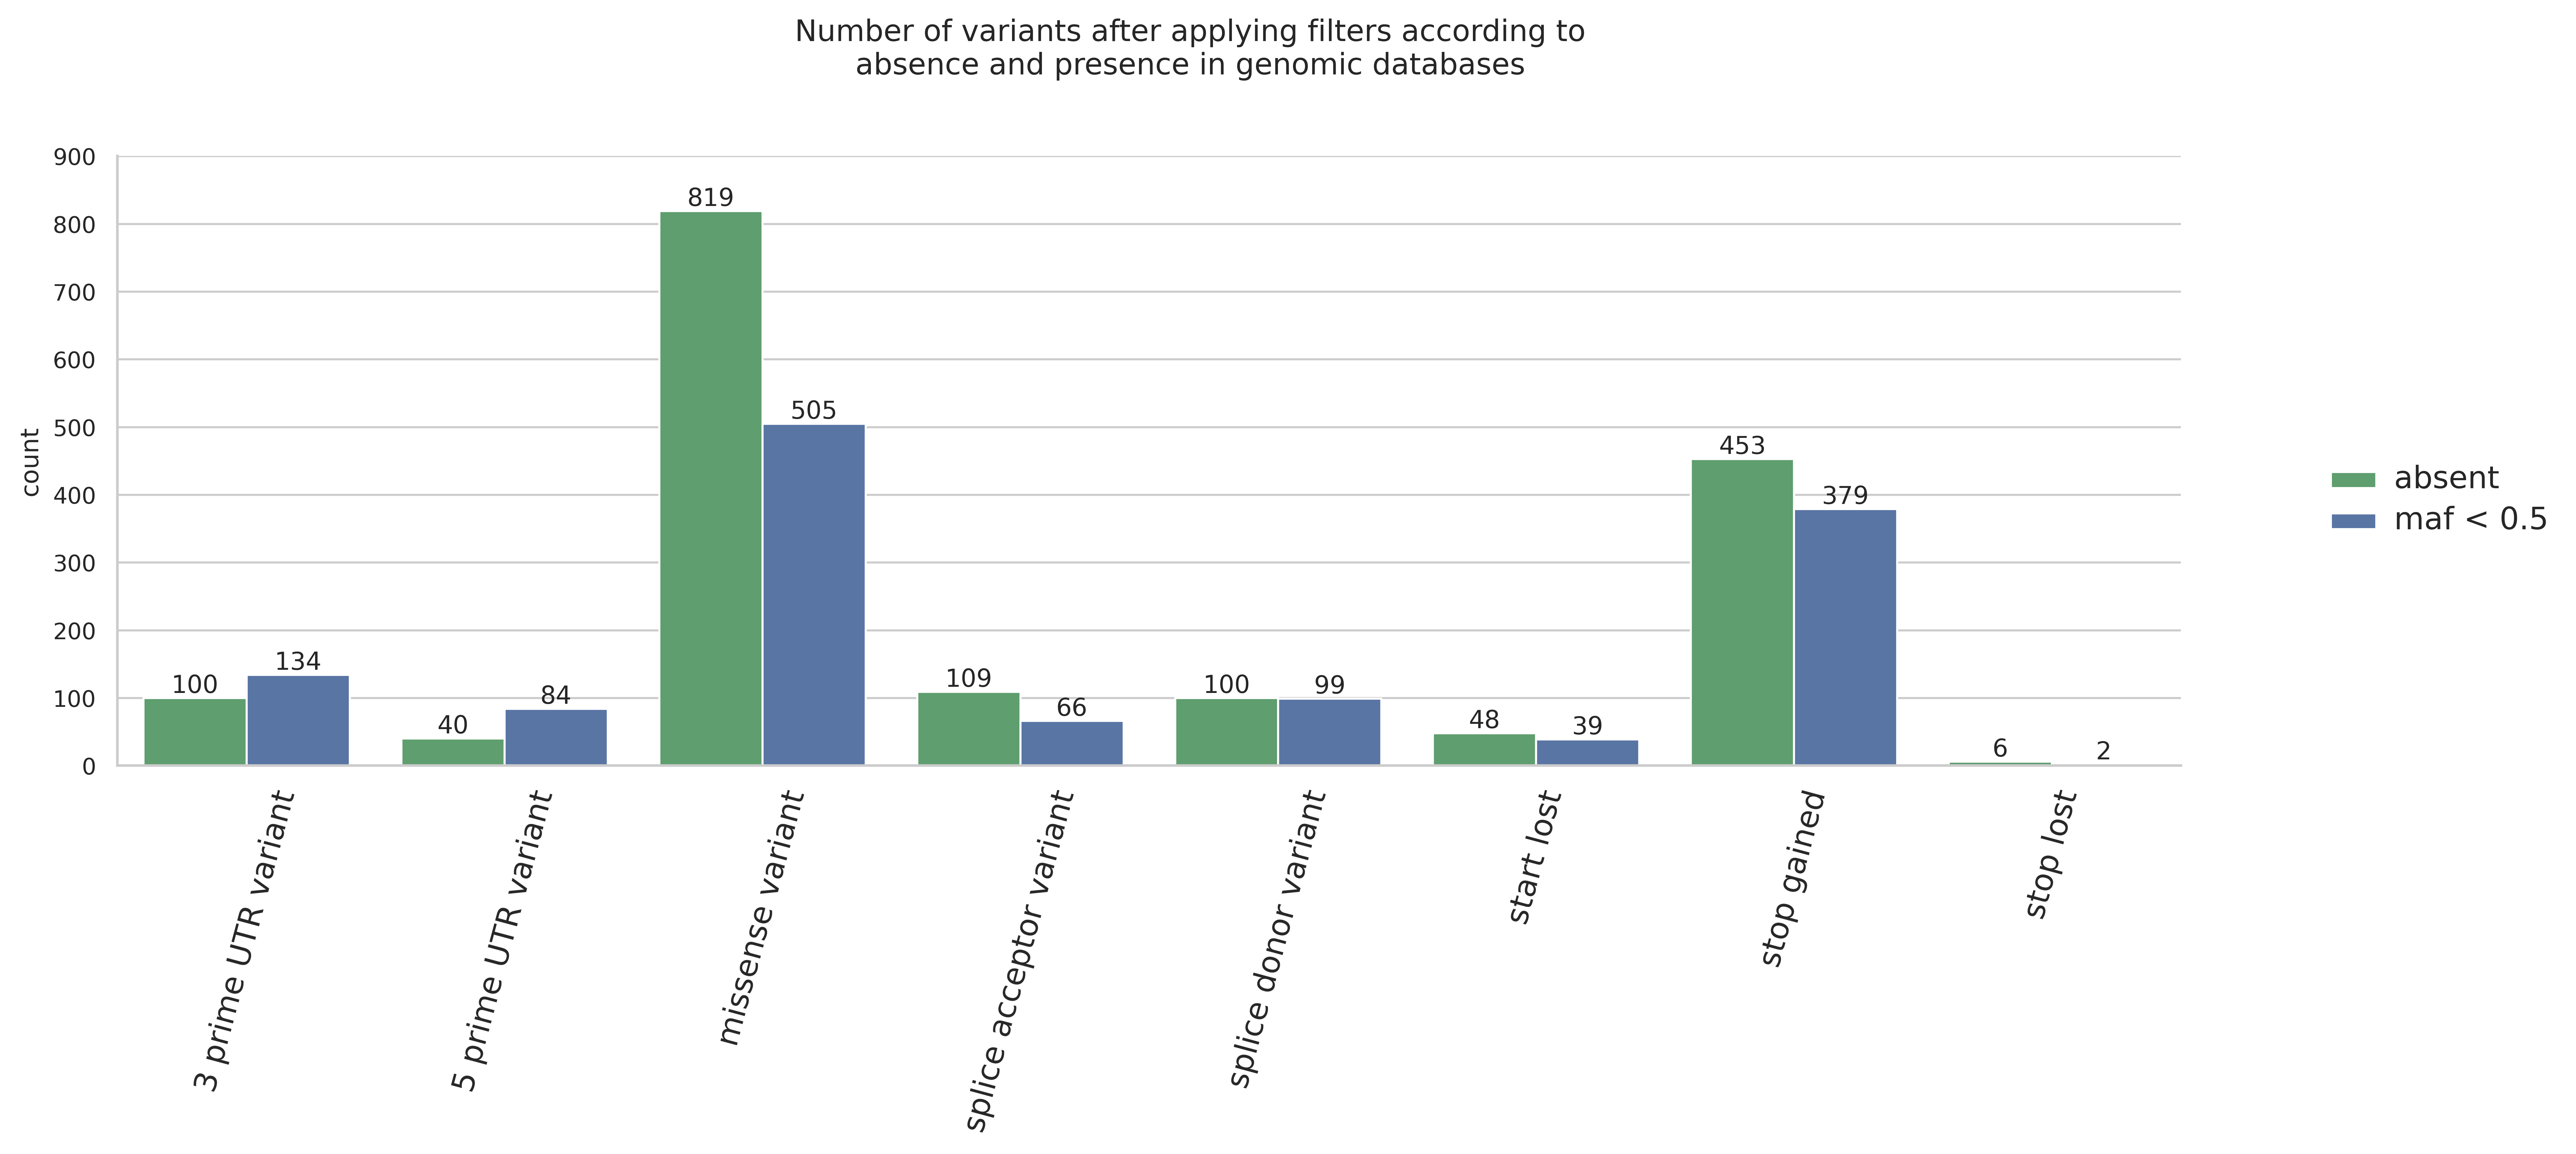

In [ ]:
# with sns.plotting_context("notebook", font_scale=1.5):
    # plotting code here...

mpl.rcParams['figure.dpi'] = 600
sns.set_theme(context='paper', style='whitegrid', palette='deep')
# sns.set_context("paper", rc={"font.size":11,"axes.titlesize":20,"axes.labelsize":15, 'font_scale': 0.5}) 

# toplot = selection[~selection['consequence'].isin(['missense'])]
# toplot = selection[selection['consequence'].isin(['missense_variant'])]
toplot = selection

g = sns.catplot(
    data=toplot,
    x='consequence',
    # col='consequence',
    # col_wrap=3,
    height=4,  # 3, 1.5 for 1 object; 4, 3 for multiple
    aspect=3, 
    # s=10
    kind='count',
    hue = 'maf_analysis',
    palette=itemgetter(2,0)(sns.color_palette('deep').as_hex()),
    order=sorted_consequences
)

g.fig.suptitle('Number of variants after applying filters according to\nabsence and presence in genomic databases', y=1.15)

g._legend.set_title('')


for ax in g.axes.flat:
    tickets = ax.get_xticklabels()
    ax.set_xlabel('', y=-1.05)
    ax.set_xticklabels([i.replace("_", ' ') for idx, i in enumerate(sorted_consequences)], rotation=75, fontdict={'fontsize':12})  
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontdict={'fontsize':12})

ax = g.axes[0, 0]
for container in ax.containers:
    ax.bar_label(container)

# ylim
g.set(ylim=(0, 900))

sns.move_legend(g, "right", bbox_to_anchor=(1.07, 0.5))  # set x between 1.-1.1

for text in g.legend.texts:
    text.set_fontsize(12)

In [ ]:
def set_vid(*strings: str):
    return "_".join([str(i) for i in strings])

selection['vid'] = selection.apply(
    lambda row: set_vid(row['chr'], row['pos'], row['ref'], row['alt']), axis=1
)

selection

/tmp/ipykernel_47005/2125889364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['vid'] = selection.apply(


,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid
188,1,19683088,G,T,stop_gained,TMCO4,36.000000,NaN,0/1,<NA>,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense,1_19683088_G_T
436,1,66776404,G,A,splice_donor_variant,DYNLT5,33.000000,NaN,0/1,<NA>,...,A,0.117381,G,A,0.110619,0.117381,0.110619,maf < 0.5,nonsense,1_66776404_G_A
554,1,112619872,G,A,5_prime_UTR_variant,"CAPZA1,ST7L",24.299999,0.394,0/1,<NA>,...,A,0.012784,G,A,0.019469,0.012784,0.019469,maf < 0.5,"UTR, inframe indels",1_112619872_G_A
584,1,116613963,G,A,stop_gained,IGSF3,38.000000,NaN,0/1,<NA>,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense,1_116613963_G_A
650,1,150968149,T,G,missense_variant,CERS2,27.400000,0.776,0/1,<NA>,...,G,0.144419,T,G,0.130088,0.144419,0.130088,maf < 0.5,missense,1_150968149_T_G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,<NA>,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,12_56782199_A_G
86410,18,47136439,T,A,start_lost,HDHD2,26.299999,NaN,0/1,<NA>,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense,18_47136439_T_A
86417,19,8112006,C,G,missense_variant,FBN3,24.600000,0.851,0/1,<NA>,...,G,0.010119,C,G,0.007965,0.010119,0.007965,maf < 0.5,missense,19_8112006_C_G
86441,20,63346836,T,C,missense_variant,CHRNA4,25.000000,0.845,0/1,C0271583;C1835905;C1854335,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,20_63346836_T_C


In [ ]:
selection['vid'].isna().any(axis=0)

False

POI genes filter

In [ ]:
poi_genes = pd.read_csv("results/23_burden_data/genespoi611.tsv", sep="\t", header=None)
poi_genes.columns = ['gene']
poi_genes


,gene
0,CTBP1-AS
1,TP73
2,NPHP4
3,H6PD
4,PIK3CD
...,...
606,SOX3
607,FMR1
608,MAMLD1
609,CETN2


In [ ]:
poi_filter = selection[
    selection['gene'].isin(poi_genes['gene'])
    ]
poi_filter

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid
1803,2,219055551,C,T,missense_variant,IHH,26.100000,0.882,0/1,C0025160;C3888239,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,2_219055551_C_T
4548,7,75985073,T,G,missense_variant,POR,33.000000,0.885,0/1,<NA>,...,G,0.000144,T,G,0.000885,0.000144,0.000885,maf < 0.5,missense,7_75985073_T_G
7613,12,47879112,A,G,start_lost,VDR,23.900000,NaN,0/1,<NA>,...,G,0.642271,A,G,0.453982,0.357729,0.453982,maf < 0.5,nonsense,12_47879112_A_G
9068,16,25227099,G,A,missense_variant,AQP8,25.299999,0.908,0/1,<NA>,...,A,0.016827,G,A,0.009735,0.016827,0.009735,maf < 0.5,missense,16_25227099_G_A
24802,16,2088569,C,T,missense_variant,TSC2,25.600000,0.812,0/1,C1834062;C0542518;C0241005;C1836296;C0020545;C...,...,T,0.001292,C,T,0.002655,0.001292,0.002655,maf < 0.5,missense,16_2088569_C_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84711,2,136115650,A,G,missense_variant,CXCR4,32.000000,0.800,0/1,<NA>,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,2_136115650_A_G
85255,15,89328532,G,C,missense_variant,POLG,24.200001,0.796,0/1,C4025751;C4073164;C0700078;C1868097;C1263846;C...,...,C,0.002300,G,C,0.000885,0.002300,0.000885,maf < 0.5,missense,15_89328532_G_C
85766,14,64268816,C,T,missense_variant,ESR2,26.000000,0.867,0/1,C2751805,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,14_64268816_C_T
86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,<NA>,...,<NA>,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,12_56782199_A_G


In [ ]:
print('unique counts ', poi_filter['gene'].nunique())
poi_filter['maf_analysis'].value_counts()

unique counts  73


absent       51
maf < 0.5    42
Name: maf_analysis, dtype: int64

In [ ]:
poi_filter['consequence'].value_counts()

missense_variant           63
stop_gained                15
splice_donor_variant        7
splice_acceptor_variant     4
start_lost                  2
5_prime_UTR_variant         1
stop_lost                   1
Name: consequence, dtype: int64

In [ ]:
# number of unique genes by variant category (absent, maf<0.5)
poi_filter.groupby(['maf_analysis'])['gene'].nunique()

maf_analysis
absent       45
maf < 0.5    37
Name: gene, dtype: int64

In [ ]:
poi_filter['gene'].value_counts()

FBN3       4
MLH1       3
XDH        2
AIRE       2
DDR2       2
          ..
POLG       1
ESR2       1
POMC       1
RICTOR     1
HSD17B6    1
Name: gene, Length: 73, dtype: Int64

save results


In [ ]:
selection.to_csv('~/workspace/projects/pof/results/23_burden_data/opencga_variants_combined_selection_absent_filtered.tsv', sep="\t")

In [ ]:
poi_filter.to_csv('~/workspace/projects/pof/results/23_burden_data/opencga_variants_combined_selection_poi_genes_absent_filtered.tsv', sep="\t")

### R tests frequency study

In [ ]:
# import os
# os.environ['R_home'] = '/home/ihenarejos/R'

In [4]:
%load_ext rpy2.ipython

In [4]:
%%R
source('/home/ihenarejos/workspace/projects/pof/scripts/rscripts/fisher_freq_dbs.R') 

R[write to console]: data.table 1.14.2 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com



In [11]:
import pandas as pd
import os

selection = pd.read_csv('~/workspace/projects/pof/results/23_burden_data/opencga_variants_combined_selection_absent_filtered.tsv', sep='\t')

poi_filter = pd.read_csv('~/workspace/projects/pof/results/23_burden_data/opencga_variants_combined_selection_poi_genes_absent_filtered.tsv', sep="\t")

os.getcwd()

'/home/ihenarejos'

In [12]:
selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2995 non-null   int64  
 1   chr                   2995 non-null   object 
 2   pos                   2995 non-null   int64  
 3   ref                   2995 non-null   object 
 4   alt                   2995 non-null   object 
 5   consequence           2983 non-null   object 
 6   gene                  2983 non-null   object 
 7   cadd                  2995 non-null   float64
 8   revel                 1599 non-null   float64
 9   genotype              2995 non-null   object 
 10  clinvar               821 non-null    object 
 11  ref_allele_gnomad     1318 non-null   object 
 12  alt_allele_gnomad     1318 non-null   object 
 13  alt_freq_gnomad       1318 non-null   float64
 14  ref_allele_1000g      1318 non-null   object 
 15  alt_allele_1000g     

In [ ]:
selection.tail()

,Unnamed: 0,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,...,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid
2990,86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,12_56782199_A_G
2991,86410,18,47136439,T,A,start_lost,HDHD2,26.299999,NaN,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,nonsense,18_47136439_T_A
2992,86417,19,8112006,C,G,missense_variant,FBN3,24.600000,0.851,0/1,...,G,0.010119,C,G,0.007965,0.010119,0.007965,maf < 0.5,missense,19_8112006_C_G
2993,86441,20,63346836,T,C,missense_variant,CHRNA4,25.000000,0.845,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,20_63346836_T_C
2994,86445,22,19132129,G,A,3_prime_UTR_variant,"TSSK2,ESS2",23.400000,0.422,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,"UTR, inframe indels",22_19132129_G_A


In [ ]:
poi_filter['vid'] = poi_filter.apply(
    lambda row: set_vid(row['chr'], row['pos'], row['ref'], row['alt']), axis=1
)
poi_filter

,Unnamed: 0,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,...,alt_allele_gnomad,alt_freq_gnomad,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid
0,1803,2,219055551,C,T,missense_variant,IHH,26.100000,0.882,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,2_219055551_C_T
1,4548,7,75985073,T,G,missense_variant,POR,33.000000,0.885,0/1,...,G,0.000144,T,G,0.000885,0.000144,0.000885,maf < 0.5,missense,7_75985073_T_G
2,7613,12,47879112,A,G,start_lost,VDR,23.900000,NaN,0/1,...,G,0.642271,A,G,0.453982,0.357729,0.453982,maf < 0.5,nonsense,12_47879112_A_G
3,9068,16,25227099,G,A,missense_variant,AQP8,25.299999,0.908,0/1,...,A,0.016827,G,A,0.009735,0.016827,0.009735,maf < 0.5,missense,16_25227099_G_A
4,24802,16,2088569,C,T,missense_variant,TSC2,25.600000,0.812,0/1,...,T,0.001292,C,T,0.002655,0.001292,0.002655,maf < 0.5,missense,16_2088569_C_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,84711,2,136115650,A,G,missense_variant,CXCR4,32.000000,0.800,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,2_136115650_A_G
89,85255,15,89328532,G,C,missense_variant,POLG,24.200001,0.796,0/1,...,C,0.002300,G,C,0.000885,0.002300,0.000885,maf < 0.5,missense,15_89328532_G_C
90,85766,14,64268816,C,T,missense_variant,ESR2,26.000000,0.867,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,14_64268816_C_T
91,86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,absent,missense,12_56782199_A_G


In [14]:
group = 'poi'  # poi, non_targeted

In [ ]:
# Not that we have the variants to calculate variant frequency in the study population, import the function required to do so:
from burden_test import retrieve_af_population

if group == 'poi':
    variant_ids = poi_filter['vid']

elif group == 'non_targeted':
    variant_ids = selection['vid'] # poi_filter['vid']

output_file = f"results/24_burden_analysis/v38_variants_burden_format_filtered_changes_opencga_af_{group}_absent_filtered.tsv"

retrieve_af_population(vid_list=variant_ids.tolist(), output_file=output_file)

In [15]:
# load frequencies from file
af_study_pop = pd.read_csv(f'~/workspace/projects/pof/results/24_burden_analysis/v38_variants_burden_format_filtered_changes_opencga_af_{group}_absent_filtered.tsv', sep="\t")
af_study_pop

,vid,cases,controls
0,1_5864439_C_T,0.004274,0.000000
1,1_27394012_C_T,0.004274,0.000000
2,1_34794828_G_C,0.000000,0.016129
3,1_119955077_G_T,0.004274,0.000000
4,1_156813906_T_C,0.008547,0.000000
...,...,...,...
88,9_34647896_C_T,0.000000,0.016129
89,9_34648170_A_G,0.004274,0.000000
90,9_104826957_C_G,0.000000,0.016129
91,9_127403679_T_C,0.000000,0.016129


In [16]:
# merge the two dataframes
#  to merge: poi_filter, selection

if group == 'poi':
    selection_merged = pd.merge(poi_filter, af_study_pop, on='vid', how='outer')
if group == 'non_targeted':
    selection_merged = pd.merge(selection, af_study_pop, on='vid', how='outer')

selection_merged

,Unnamed: 0,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,...,ref_allele_1000g,alt_allele_1000g,alt_freq_1000g,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,cases,controls
0,1803,2,219055551,C,T,missense_variant,IHH,26.100000,0.882,0/1,...,NaN,NaN,NaN,2.000000,2.000000,absent,missense,2_219055551_C_T,0.004274,0.000000
1,4548,7,75985073,T,G,missense_variant,POR,33.000000,0.885,0/1,...,T,G,0.000885,0.000144,0.000885,maf < 0.5,missense,7_75985073_T_G,0.004274,0.000000
2,7613,12,47879112,A,G,start_lost,VDR,23.900000,NaN,0/1,...,A,G,0.453982,0.357729,0.453982,maf < 0.5,nonsense,12_47879112_A_G,0.619658,0.709677
3,9068,16,25227099,G,A,missense_variant,AQP8,25.299999,0.908,0/1,...,G,A,0.009735,0.016827,0.009735,maf < 0.5,missense,16_25227099_G_A,0.012821,0.000000
4,24802,16,2088569,C,T,missense_variant,TSC2,25.600000,0.812,0/1,...,C,T,0.002655,0.001292,0.002655,maf < 0.5,missense,16_2088569_C_T,0.004274,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,84711,2,136115650,A,G,missense_variant,CXCR4,32.000000,0.800,0/1,...,NaN,NaN,NaN,2.000000,2.000000,absent,missense,2_136115650_A_G,0.000000,0.016129
89,85255,15,89328532,G,C,missense_variant,POLG,24.200001,0.796,0/1,...,G,C,0.000885,0.002300,0.000885,maf < 0.5,missense,15_89328532_G_C,0.004274,0.000000
90,85766,14,64268816,C,T,missense_variant,ESR2,26.000000,0.867,0/1,...,NaN,NaN,NaN,2.000000,2.000000,absent,missense,14_64268816_C_T,0.004274,0.000000
91,86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,...,NaN,NaN,NaN,2.000000,2.000000,absent,missense,12_56782199_A_G,0.004274,0.000000


/tmp/ipykernel_7760/3036733498.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(round(float(i) * 118, 0))) for i in ax.get_yticks()])


              cadd  revel  alt_freq_gnomad        cases
count  1294.000000    0.0       583.000000  1294.000000
mean     33.575031    NaN         0.057616     0.035744
std       6.168027    NaN         0.134907     0.107264
min      20.100000    NaN         0.000072     0.000000
25%      31.000000    NaN         0.001581     0.004274
50%      34.000000    NaN         0.007358     0.004274
75%      37.000000    NaN         0.039161     0.008547
max      60.000000    NaN         0.904129     0.970085


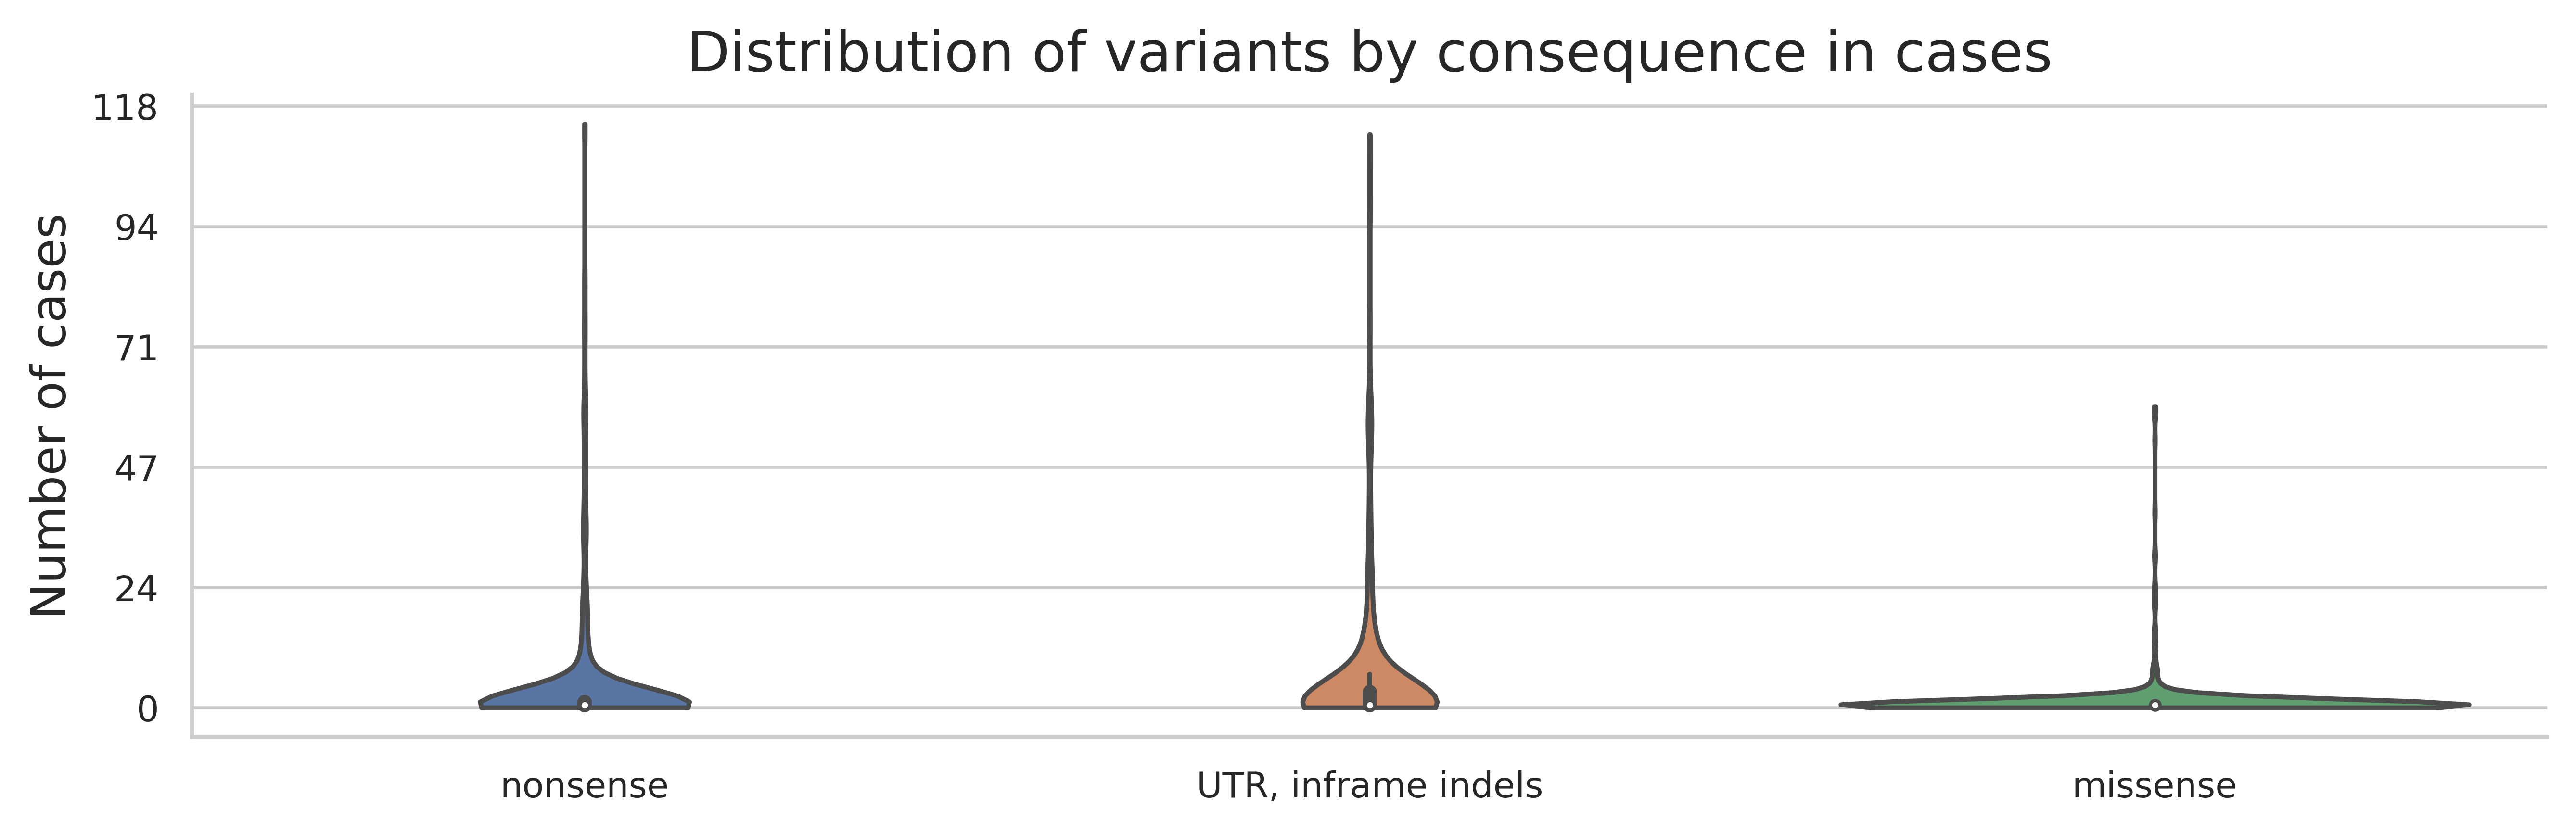

In [ ]:
# VIOLIN plots
mpl.rcParams['figure.dpi'] = 600
sns.set_theme(context='paper', style='whitegrid', palette='deep')
sns.set_context("paper", rc={"font.size":10.5,"axes.titlesize":14,"axes.labelsize":12, "title.size":16}) 

toplot = (selection_merged[
    ~selection_merged[['cases', 'controls']].isna().any(axis=1)
]
)

g = sns.catplot(
    kind='violin',
    data=toplot,
    x='consequence_analysis',
    y='cases',
    cut=0,
    height=3,
    aspect=3
    # hue='maf_analysis',
)


for ax in g.axes.flat:
    ax.set_xlabel('', y=-1.05)
    ax.set_ylabel('Number of cases',  x=-1.05)
    ax.set_yticklabels([str(int(round(float(i) * 118, 0))) for i in ax.get_yticks()])
    
plt.title('Distribution of variants by consequence in cases')

print(toplot[toplot['consequence_analysis'] == 'nonsense'][['cadd', 'revel', 'alt_freq_gnomad', 'cases']].describe())

In [17]:
selection_merged['maf_analysis'].value_counts()

absent       51
maf < 0.5    42
Name: maf_analysis, dtype: int64

Variant freq analysis by fisher test ( 118 cases vs gnomad, 1000g)

In [18]:
# select only af frequencies for fisher test

df_fisher = selection_merged[selection_merged["maf_analysis"].isin(["maf < 0.5"])][
    ["vid", "cases", "controls", "alt_freq_1000g", "alt_freq_gnomad"]
]


# studies = ['alt_freq_1000g', 'alt_freq_gnomad']
# control_pop = [486, 38_078]
study = "alt_freq_1000g"

if study == "alt_freq_1000g":
    control_pop = 486

if study == "alt_freq_gnomad":
    control_pop = 38_078


In [19]:

df_fisher[df_fisher[['cases', study]].isna().any(axis=1)]

df_fisher = df_fisher[['vid', 'cases', study]].dropna()

df_fisher.shape

(42, 3)

In [20]:
%%R -i df_fisher,study,control_pop

# 1000g ph3 = 2,504 (258 EUR female) (486 EUR)
# gnomad genomes female = 76,156/2 = 38078

fisher_res = fisher_test_variants_freq(df_fisher, 'vid', study, 'cases', control_pop= control_pop)

fisher_res = as.data.frame(fisher_res)
fisher_res['padj'] = p.adjust(fisher_res$p.value, method = "fdr")

[1] "7_75985073_T_G"
[1] "12_47879112_A_G"
[1] "16_25227099_G_A"
[1] "16_2088569_C_T"
[1] "19_8103654_C_T"
[1] "5_13737270_G_A"
[1] "5_80813660_T_G"
[1] "14_94497767_G_A"
[1] "3_37047639_A_G"
[1] "3_37047640_A_C"
[1] "11_102797986_A_G"
[1] "1_236826841_G_A"
[1] "1_197105038_G_A"
[1] "12_56004018_C_T"
[1] "10_86921680_C_T"
[1] "4_39274909_C_T"
[1] "6_118816282_C_A"
[1] "1_5864439_C_T"
[1] "3_10065867_G_C"
[1] "5_132861594_G_A"
[1] "12_56004747_G_A"
[1] "13_32398489_A_T"
[1] "14_20403450_T_C"
[1] "8_42180647_G_A"
[1] "5_39074383_C_T"
[1] "7_137251230_C_A"
[1] "1_241885313_G_C"
[1] "3_149527888_T_A"
[1] "5_176889558_C_T"
[1] "2_25161179_G_C"
[1] "16_8811153_G_A"
[1] "19_54981615_A_T"
[1] "21_44291116_G_A"
[1] "21_42493049_C_A"
[1] "3_37047607_T_A"
[1] "14_74480701_C_T"
[1] "9_104826957_C_G"
[1] "5_42711274_G_A"
[1] "9_34648170_A_G"
[1] "16_8811660_T_C"
[1] "15_89328532_G_C"
[1] "19_8112006_C_G"


In [21]:
fisher_res_py = %R fisher_res
threshold = 0.05 # 0.05, 0.1

print(fisher_res_py['padj'].describe())
fisher_res_py[fisher_res_py['padj'] < threshold]


count    42.000000
mean      0.600432
std       0.261293
min       0.061387
25%       0.410265
50%       0.569943
75%       0.790601
max       1.000000
Name: padj, dtype: float64


,vid,p.value,estimate,padj


In [ ]:
# to merge: selection, poi_filter

if group == 'poi':
    fisher_merge = pd.merge(poi_filter, fisher_res_py, on='vid', how='left')

if group == 'non_targeted':
    fisher_merge = pd.merge(selection, fisher_res_py, on='vid', how='left')
    
fisher_merge = pd.merge(fisher_merge, af_study_pop, on='vid', how='left')
fisher_merge
fisher_merge[fisher_merge['padj'] < threshold]

,Unnamed: 0,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls


In [ ]:
# save fisher results for 1000g
padj_1000g = fisher_merge[
    (fisher_merge['padj'] < threshold) 
    ]
padj_1000g.shape

(0, 27)

In [ ]:
# save fisher results for gnomad
padj_gnomad = fisher_merge[
    (fisher_merge['padj'] < threshold) 
    ]
padj_gnomad.shape

(3, 27)

In [ ]:
# concat results between databases (targeted)
targeted_2_burden = pd.concat([padj_1000g, padj_gnomad, fisher_merge[fisher_merge['maf_analysis'] == 'absent']], axis=0)
targeted_2_burden

,Unnamed: 0,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
12,34442,3,37047639,A,G,missense_variant,MLH1,28.000000,0.874,0/1,...,0.003374,0.008850,maf < 0.5,missense,3_37047639_A_G,0.000061,0.076275,0.001272,0.038462,0.000000
13,34443,3,37047640,A,C,missense_variant,MLH1,26.600000,0.963,0/1,...,0.003374,0.008850,maf < 0.5,missense,3_37047640_A_C,0.000061,0.076275,0.001272,0.038462,0.000000
31,53422,3,10065867,G,C,missense_variant,FANCD2,26.500000,0.768,0/1,...,0.000215,0.000885,maf < 0.5,missense,3_10065867_G_C,0.000419,0.012213,0.005866,0.012821,0.064516
0,1803,2,219055551,C,T,missense_variant,IHH,26.100000,0.882,0/1,...,2.000000,2.000000,absent,missense,2_219055551_C_T,NaN,NaN,NaN,0.004274,0.000000
5,25050,19,56815522,A,G,missense_variant,PEG3,23.000000,0.835,0/1,...,2.000000,2.000000,absent,missense,19_56815522_A_G,NaN,NaN,NaN,0.004274,0.000000
7,26520,19,11120143,C,T,missense_variant,LDLR,27.500000,0.845,0/1,...,2.000000,2.000000,absent,missense,19_11120143_C_T,NaN,NaN,NaN,0.004274,0.000000
10,32425,14,75002993,G,T,start_lost,EIF2B2,25.400000,NaN,0/1,...,2.000000,2.000000,absent,nonsense,14_75002993_G_T,NaN,NaN,NaN,0.004274,0.000000
14,35055,1,204190548,C,T,missense_variant,KISS1,25.000000,0.851,0/1,...,2.000000,2.000000,absent,missense,1_204190548_C_T,NaN,NaN,NaN,0.000000,0.016129
17,37748,1,27394012,C,T,missense_variant,GPR3,26.000000,0.760,0/1,...,2.000000,2.000000,absent,missense,1_27394012_C_T,NaN,NaN,NaN,0.004274,0.000000
19,38381,2,11785042,C,A,stop_gained,LPIN1,36.000000,NaN,0/1,...,2.000000,2.000000,absent,nonsense,2_11785042_C_A,NaN,NaN,NaN,0.004274,0.000000


In [ ]:
# concat results between databases (non-targeted)
non_targeted_2_burden = pd.concat([padj_1000g, padj_gnomad, fisher_merge[fisher_merge['maf_analysis'] == 'absent']], axis=0)
non_targeted_2_burden

In [ ]:
non_targeted_2_burden = pd.read_csv('~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_non_targeted.tsv', sep="\t")
non_targeted_2_burden

,Unnamed: 0,Unnamed: 0.1,chr,pos,ref,alt,consequence,gene,cadd,revel,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
0,13,1207,1,247949724,T,A,stop_gained,OR2L8,33.000000,NaN,...,0.198004,0.305310,maf < 0.5,nonsense,1_247949724_T_A,7.121701e-12,0.080328,2.845388e-09,0.970085,0.983871
1,69,4531,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
2,70,4531,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
3,71,4531,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
4,72,4531,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,3053,86341,12,51359200,C,G,missense_variant,GALNT6,25.299999,0.752,...,2.000000,2.000000,absent,missense,12_51359200_C_G,NaN,NaN,NaN,0.004274,0.000000
1764,3054,86343,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,...,2.000000,2.000000,absent,missense,12_56782199_A_G,NaN,NaN,NaN,0.004274,0.000000
1765,3055,86410,18,47136439,T,A,start_lost,HDHD2,26.299999,NaN,...,2.000000,2.000000,absent,nonsense,18_47136439_T_A,NaN,NaN,NaN,0.004274,0.000000
1766,3057,86441,20,63346836,T,C,missense_variant,CHRNA4,25.000000,0.845,...,2.000000,2.000000,absent,missense,20_63346836_T_C,NaN,NaN,NaN,0.004274,0.000000


In [ ]:
non_targeted_2_burden['maf_analysis'].value_counts()

absent       1677
maf < 0.5      91
Name: maf_analysis, dtype: int64

In [ ]:
print(non_targeted_2_burden['gene'].nunique())

non_targeted_2_burden.groupby(['maf_analysis'])['gene'].nunique().value_counts()

1461


1409    1
67      1
Name: gene, dtype: int64

In [ ]:
print(targeted_2_burden['gene'].nunique())

targeted_2_burden.groupby(['maf_analysis'])['gene'].nunique().value_counts()

47


45    1
2     1
Name: gene, dtype: int64

In [ ]:
targeted_2_burden.to_csv('~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_targeted.tsv', sep="\t")

In [ ]:
non_targeted_2_burden.to_csv('~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_non_targeted.tsv', sep="\t")

In [ ]:
# files: /home/ihenarejos/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_non_targeted.tsv
# ~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_poi.tsv

analysis = 'non_targeted' # non_targeted, poi  

file_to_read = f'/home/ihenarejos/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_{analysis}.tsv'

In [ ]:
# get genotypes using ids:

from burden_test import get_genotype_using_variant_id

genotype_file = f'/home/ihenarejos/workspace/projects/pof/results/24_burden_analysis/v38_variants_burden_format_filtered_{analysis}_with_absent_fisher_dbs.tsv'

get_genotype_using_variant_id(file=file_to_read, output= genotype_file)

In [ ]:
# get variants from 1000g vcf

from burden_test import get_variants_1000g

get_variants_1000g(
    dir_1000g='/home/ihenarejos/workspace/projects/pof/data/1000g_grch38',
    genotypes=genotype_file,
    )


burden test analysis

In [ ]:
# load 1000g vcf retrieval
import pandas as pd
burden = pd.read_csv('/home/sinh/workspace/projects/pof/results/24_burden_analysis/burden_absent_fisher_non_targeted.vcf', sep="\t")

burden = pd.concat([burden.iloc[:, 1:2], burden.iloc[:, 9:]], axis=1)
burden

,POS,HG00315,HG00327,HG00334,HG00339,HG00346,HG00353,HG00365,HG00377,HG00384,...,HG01613,HG01618,HG01620,HG01632,HG01668,HG01670,HG01776,HG01702,HG01707,HG01757
0,33026859,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,42477381,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,23559813,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,24440156,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,...,1|1,1|1,0|1,1|1,1|1,1|1,1|1,1|1,1|1,0|1
4,63599645,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,21339085,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
187,35001982,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
188,36614321,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
189,38558361,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0


In [ ]:
non_targeted = pd.read_csv(genotype_file, sep="\t")
non_targeted = non_targeted.iloc[:, 0:]
non_targeted

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CONTROL_118,...,FOP_33,FOP_34,FOP_35,FOP_3,FOP_4,FOP_5,FOP_6,FOP_7,FOP_8,FOP_9
0,1,944723,.,C,A,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1,1,1334151,.,T,C,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
2,1,1406962,.,C,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
3,1,1722781,.,A,C,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
4,1,2511342,.,A,C,.,.,.,GT,./.,...,0/1,./.,./.,./.,./.,./.,./.,./.,./.,./.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,X,151700665,.,C,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1694,X,153541392,.,G,A,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1695,X,154349846,.,A,G,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1696,X,154896132,.,C,G,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.


In [ ]:
poi = pd.read_csv(genotype_file, sep="\t")
poi = poi.iloc[:, 0:]
poi

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CONTROL_118,...,FOP_33,FOP_34,FOP_35,FOP_3,FOP_4,FOP_5,FOP_6,FOP_7,FOP_8,FOP_9
0,1,5864439,.,C,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1,1,27394012,.,C,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
2,1,34794828,.,G,C,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
3,1,119955077,.,G,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
4,1,156813906,.,T,C,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,8,3406147,.,C,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
58,8,42181954,.,C,A,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
59,9,34647896,.,C,T,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
60,9,127403679,.,T,C,.,.,.,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.


In [ ]:
# import re

# to merge: poi, non_targeted
merged_burden = pd.merge(non_targeted, burden, on="POS", how="left")

def format_gt(*strings):
    for i in strings:
        # res = re.sub(pattern='[^a-zA-Z0-9 \n\.]', repl='/', string=i)
        res = i.replace("|", "/")
        res = res.replace("./.", "0/0")
    return res


merged_burden.iloc[:, 9:] = merged_burden.iloc[:, 9:].fillna("0/0").apply(format_gt)

merged_burden.to_csv(
    f"/home/sinh/workspace/projects/pof/results/24_burden_analysis/to_burden_{analysis}_absent_fisher.vcf",
    sep="\t",
    index=False,
)
merged_burden


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CONTROL_118,...,HG01613,HG01618,HG01620,HG01632,HG01668,HG01670,HG01776,HG01702,HG01707,HG01757
0,1,944723,.,C,A,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,1,1334151,.,T,C,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
2,1,1406962,.,C,T,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,1,1722781,.,A,C,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,1,2511342,.,A,C,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,X,151700665,.,C,T,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1695,X,153541392,.,G,A,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1696,X,154349846,.,A,G,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1697,X,154896132,.,C,G,.,.,.,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [ ]:
# phenotype file with 1000g
sep = "\t"
header = f"fid{sep}iid{sep}fatid{sep}matid{sep}sex{sep}of\n"

samples = merged_burden.columns.to_list()[9:]

with open("results/24_burden_analysis/samples_burden.tsv", "w") as fout:
    res = []
    res.append(header)
    for s in samples:
        if s.split("_")[0] in ["FOP", "FOO"]:
            sample_class = "2"
        else:
            sample_class = "1"

        res.append(f"{s}{sep}{s}{sep}{0}{sep}{0}{sep}{2}{sep}{sample_class}\n")

    fout.writelines(res)


Burden padj

In [5]:
burden_res = pd.read_csv('/home/ihenarejos/workspace/projects/pof/results/23_burden_data/_of/non_targeted_all_filters.CMC.assoc', sep="\t")
burden_res

,Range,RANGE,N_INFORMATIVE,NumVar,NumPolyVar,NonRefSite,Pvalue
0,PRDM16,1:3069168-3438621,373,1,1,1,4.957660e-01
1,TAS1R3,1:1331280-1335314,373,1,1,1,1.410170e-01
2,CLCN6,1:11806096-11848079,373,1,1,1,1.410170e-01
3,PANK4,1:2508537-2526597,373,2,2,2,3.711050e-02
4,VPS13D,1:12230030-12512047,373,1,1,1,1.410170e-01
...,...,...,...,...,...,...,...
1697,PRRG3,X:151694607-151705924,373,1,1,1,1.410170e-01
1698,STS,X:7147237-7804358,373,1,1,1,4.957660e-01
1699,ATP7A,X:77910690-78050395,373,1,1,1,1.410170e-01
1700,GLOD5,X:48761747-48773648,373,1,1,1,1.410170e-01


In [6]:
%%R -i burden_res

burden_res['padj'] = p.adjust(burden_res$Pvalue, method = "fdr") # for the rest
# burden_res['padj'] = p.adjust(burden_res$PermPvalue, method = "fdr") # racover, madson
# burden_res['padj'] = p.adjust(burden_res$PvalueGreater, method = "fdr") # fisher


In [7]:
burden_res = %R burden_res
print(burden_res['padj'].describe())
print(burden_res[burden_res['padj'] < 0.05].shape)
burden_res[burden_res['padj'] < 0.05]

count    1.702000e+03
mean     2.587294e-01
std      1.510326e-01
min      5.351950e-55
25%      1.841987e-01
50%      1.841987e-01
75%      1.841987e-01
max      9.493730e-01
Name: padj, dtype: float64
(19, 8)


,Range,RANGE,N_INFORMATIVE,NumVar,NumPolyVar,NonRefSite,Pvalue,padj
63,IGSF3,1:116574399-116667755,373,1,1,149,8.549610e-57,3.637859e-54
94,AK2,1:33007940-33080996,373,2,2,153,8.147260e-22,1.540737e-19
182,CTBP2,10:124984317-125161170,373,20,20,150,9.433520e-58,5.351950e-55
264,ESRRA,11:64305497-64316743,373,1,1,246,1.710280e-10,2.425747e-08
266,MTCH2,11:47617315-47642607,373,5,5,174,6.953620e-28,1.479383e-25
395,KMT5A,12:123384132-123409353,373,1,1,146,1.574480e-55,5.359530e-53
490,WDR89,14:63597039-63641871,373,2,2,61,1.036460e-13,1.603686e-11
644,CDC27,17:47117703-47189422,373,9,9,150,9.433520e-58,5.351950e-55
878,TEKT4,2:94871430-94876823,373,1,1,15,3.933600e-05,4.184367e-03
994,ANKRD36B,2:97492663-97589877,373,1,1,65,4.127180e-19,7.024460e-17


In [36]:
burden_res[burden_res['padj'] < 0.05]['Range'].nunique()

19

retrieve variant data from significant genes 

In [47]:
non_targeted_2_burden = pd.read_csv('~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_non_targeted.tsv', sep="\t")
non_targeted_2_burden.drop(['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, axis=1)
non_targeted_2_burden = non_targeted_2_burden.explode('gene')
non_targeted_2_burden

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
0,1,247949724,T,A,stop_gained,OR2L8,33.000000,NaN,1/1,NaN,...,0.198004,0.305310,maf < 0.5,nonsense,1_247949724_T_A,7.121701e-12,0.080328,2.845388e-09,0.970085,0.983871
1,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
2,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
3,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
4,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,12,51359200,C,G,missense_variant,GALNT6,25.299999,0.752,0/1,NaN,...,2.000000,2.000000,absent,missense,12_51359200_C_G,NaN,NaN,NaN,0.004274,0.000000
1764,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,NaN,...,2.000000,2.000000,absent,missense,12_56782199_A_G,NaN,NaN,NaN,0.004274,0.000000
1765,18,47136439,T,A,start_lost,HDHD2,26.299999,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,18_47136439_T_A,NaN,NaN,NaN,0.004274,0.000000
1766,20,63346836,T,C,missense_variant,CHRNA4,25.000000,0.845,0/1,C0271583;C1835905;C1854335,...,2.000000,2.000000,absent,missense,20_63346836_T_C,NaN,NaN,NaN,0.004274,0.000000


In [52]:
significant_genes = (
    non_targeted_2_burden[non_targeted_2_burden['gene']
    .isin(burden_res[burden_res['padj'] < 0.05]['Range'])
    ]
)
significant_genes.sort_values(['chr'], inplace=True)

significant_genes.to_csv('~/workspace/projects/pof/results/24_burden_analysis/significant_genes_burden_with_info.tsv', sep="\t", index=False)
significant_genes

/tmp/ipykernel_103151/796787813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_genes.sort_values(['chr'], inplace=True)


,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
92,1,116613963,G,A,stop_gained,IGSF3,38.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,1_116613963_G_A,NaN,NaN,NaN,0.495726,0.500000
83,1,33013299,T,A,missense_variant,AK2,28.500000,0.827,0/1,NaN,...,0.001174,0.236283,maf < 0.5,missense,1_33013299_T_A,4.491547e-04,0.045373,1.231432e-02,0.021368,0.000000
19,1,33013299,T,A,missense_variant,AK2,28.500000,0.827,0/1,NaN,...,0.001174,0.236283,maf < 0.5,missense,1_33013299_T_A,4.009462e-09,11.855116,6.595564e-07,0.021368,0.000000
82,1,33013287,C,T,missense_variant,AK2,25.400000,0.817,0/1,NaN,...,0.000393,0.114159,maf < 0.5,missense,1_33013287_C_T,2.267159e-05,0.015127,1.491791e-03,0.021368,0.000000
597,10,125003466,G,T,missense_variant,CTBP2,27.299999,0.847,0/1,NaN,...,2.000000,2.000000,absent,missense,10_125003466_G_T,NaN,NaN,NaN,0.029915,0.112903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,7,152265211,T,C,splice_acceptor_variant,KMT2C,34.000000,NaN,0/1,C1849340;C1837218;C4021805;C0003803;C1697450;C...,...,2.000000,2.000000,absent,nonsense,7_152265211_T_C,NaN,NaN,NaN,0.072650,0.129032
102,9,67859630,G,A,splice_donor_variant,ANKRD20A1,24.400000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,9_67859630_G_A,NaN,NaN,NaN,0.474359,0.467742
103,9,67871210,C,G,stop_gained,ANKRD20A1,23.100000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,9_67871210_C_G,NaN,NaN,NaN,0.500000,0.500000
120,X,55146197,G,A,stop_gained,FAM104B,33.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,X_55146197_G_A,NaN,NaN,NaN,0.397436,0.370968


In [56]:
(
    set(burden_res[burden_res["padj"] < 0.05]['Range'].unique().tolist())
    -
    set(significant_genes['gene'].unique().tolist()) 
)

{'LINC00960'}

In [59]:
(
    non_targeted_2_burden[non_targeted_2_burden['pos'].between(75672254, 75742048)]
)


,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
23,3,75738339,A,T,stop_gained,ZNF717,25.100000,NaN,0/1,NaN,...,0.010366,0.276106,maf < 0.5,nonsense,3_75738339_A_T,8.029628e-60,0.01586,1.056699e-56,0.401709,0.451613
96,3,75737105,T,A,stop_gained,ZNF717,34.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75737105_T_A,NaN,NaN,NaN,0.487179,0.467742
97,3,75737676,A,T,stop_gained,ZNF717,32.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75737676_A_T,NaN,NaN,NaN,0.500000,0.500000
98,3,75737765,C,A,stop_gained,ZNF717,23.500000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75737765_C_A,NaN,NaN,NaN,0.478632,0.483871
99,3,75737976,G,T,stop_gained,ZNF717,24.500000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75737976_G_T,NaN,NaN,NaN,0.367521,0.290323
100,3,75738877,G,C,stop_gained,ZNF717,24.700001,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75738877_G_C,NaN,NaN,NaN,NaN,NaN
149,3,75737459,T,A,stop_gained,ZNF717,30.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75737459_T_A,NaN,NaN,NaN,NaN,NaN
214,3,75737666,C,A,stop_gained,ZNF717,28.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75737666_C_A,NaN,NaN,NaN,NaN,NaN
459,3,75738986,C,A,stop_gained,ZNF717,23.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,3_75738986_C_A,NaN,NaN,NaN,NaN,NaN


study genocodis annotations

In [3]:
genecodis = pd.read_csv('/home/ihenarejos/workspace/projects/pof/results/24_burden_analysis/enrich-input1-GO_BP.tsv', sep="\t")
genecodis

,description,annotation_id,genes_found,input_size,term_genes,universe,pval,pval_adj,relative_enrichment,annotsbias,genes
0,meiotic spindle midzone assembly,GO:0051257,1,14,2,18003,0.001555,0.019656,642.964286,0,MLH1
1,regulation of mitochondrial fusion,GO:0010635,1,14,2,18003,0.001555,0.019656,642.964286,0,MTCH2
2,positive regulation of insulin secretion invol...,GO:0035774,2,14,27,18003,0.000195,0.019656,95.253968,0,"CFTR, HLA-DRB1"
3,positive regulation of voltage-gated chloride ...,GO:1902943,1,14,2,18003,0.001555,0.019656,642.964286,0,CFTR
4,"regulation of DNA damage response, signal tran...",GO:0043516,1,14,5,18003,0.003883,0.019656,257.185714,0,KMT5A
...,...,...,...,...,...,...,...,...,...,...,...
157,proteolysis,GO:0006508,1,14,617,18003,0.386395,0.396177,2.084163,0,MST1
158,ion transport,GO:0006811,1,14,669,18003,0.411604,0.419370,1.922165,0,CFTR
159,phosphorylation,GO:0016310,1,14,713,18003,0.432180,0.437582,1.803546,0,AK2
160,cell differentiation,GO:0030154,1,14,1013,18003,0.555627,0.559078,1.269426,0,CTBP2


In [4]:
genecodis['genes'] = genecodis['genes'].str.split(",")
genecodis = genecodis.explode(['genes'])
genecodis

,description,annotation_id,genes_found,input_size,term_genes,universe,pval,pval_adj,relative_enrichment,annotsbias,genes
0,meiotic spindle midzone assembly,GO:0051257,1,14,2,18003,0.001555,0.019656,642.964286,0,MLH1
1,regulation of mitochondrial fusion,GO:0010635,1,14,2,18003,0.001555,0.019656,642.964286,0,MTCH2
2,positive regulation of insulin secretion invol...,GO:0035774,2,14,27,18003,0.000195,0.019656,95.253968,0,CFTR
2,positive regulation of insulin secretion invol...,GO:0035774,2,14,27,18003,0.000195,0.019656,95.253968,0,HLA-DRB1
3,positive regulation of voltage-gated chloride ...,GO:1902943,1,14,2,18003,0.001555,0.019656,642.964286,0,CFTR
...,...,...,...,...,...,...,...,...,...,...,...
157,proteolysis,GO:0006508,1,14,617,18003,0.386395,0.396177,2.084163,0,MST1
158,ion transport,GO:0006811,1,14,669,18003,0.411604,0.419370,1.922165,0,CFTR
159,phosphorylation,GO:0016310,1,14,713,18003,0.432180,0.437582,1.803546,0,AK2
160,cell differentiation,GO:0030154,1,14,1013,18003,0.555627,0.559078,1.269426,0,CTBP2


In [16]:
(
    genecodis.groupby(['genes'])[['description']].value_counts().reset_index()
).sort_values(by=['genes'], axis=0).to_csv('/home/ihenarejos/workspace/projects/pof/results/24_burden_analysis/genecodis_analysis.tsv', sep="\t")

In [38]:
(
    genecodis.groupby(['genes'])[['description']].value_counts().sort_index()
)


genes      description                                                                               
 CTBP2     negative regulation of transcription by RNA polymerase II                                     1
           negative regulation of transcription, DNA-templated                                           1
           positive regulation of transcription by RNA polymerase II                                     1
 HLA-DRB1  positive regulation of insulin secretion involved in cellular response to glucose stimulus    1
           positive regulation of transcription, DNA-templated                                           1
                                                                                                        ..
MTCH2      protein localization to mitochondrion                                                         1
           regulation of mitochondrial fusion                                                            1
TEKT4      cell projection organization   

Estimate population of 1000G EUR

In [ ]:
df_finnish = pd.read_csv('~/workspace/projects/pof/results/23_burden_data/samples_info_dbs/igsr-fin.tsv.tsv', sep="\t")[['Sample name', 'Sex', 'Population name', 'Superpopulation code']] 
df_gbs = pd.read_csv('~/workspace/projects/pof/results/23_burden_data/samples_info_dbs/igsr-gbr.tsv.tsv', sep="\t")[['Sample name', 'Sex', 'Population name', 'Superpopulation code']] 
df_iberian = pd.read_csv('~/workspace/projects/pof/results/23_burden_data/samples_info_dbs/igsr-ibs.tsv.tsv', sep="\t")[['Sample name', 'Sex', 'Population name', 'Superpopulation code']] 
df_italian = pd.read_csv('~/workspace/projects/pof/results/23_burden_data/samples_info_dbs/igsr-tsi.tsv.tsv', sep="\t")[['Sample name', 'Sex', 'Population name', 'Superpopulation code']] 

df_1000g_samples = pd.concat([df_finnish, df_italian, df_gbs, df_iberian], axis=0)

df_1000g_samples

,Sample name,Sex,Population name,Superpopulation code
0,HG00315,female,Finnish,EUR
1,HG00327,female,Finnish,EUR
2,HG00334,female,Finnish,EUR
3,HG00339,female,Finnish,EUR
4,HG00341,male,Finnish,EUR
...,...,...,...,...
157,HG02217,female,Iberian,EUR
158,HG02224,male,Iberian,EUR
159,HG02229,female,Iberian,EUR
160,HG02231,male,Iberian,EUR


In [ ]:
df_1000g_samples['Population name'].value_counts().to_csv('/home/ihenarejos/workspace/projects/pof/results/23_burden_data/samples_info_dbs/female_eur_pop.counts.tsv', sep="\t")

In [ ]:
print(df_1000g_samples['Sex'].value_counts()
)

df_1000g_samples[4
    df_1000g_samples['Sex'] == 'female'
]['Population name'].value_counts()

female    258
male      228
Name: Sex, dtype: int64


Iberian            80
Finnish            64
British            56
Toscani            55
Finnish,Finnish     1
British,English     1
Iberian,Spanish     1
Name: Population name, dtype: int64

In [ ]:
df_1000g_samples[
    df_1000g_samples['Sex'] == 'female'
].to_csv('~/workspace/projects/pof/results/23_burden_data/samples_info_dbs/female_eur_pop.tsv', sep="\t", index=False)
df_1000g_samples

,Sample name,Sex,Population name,Superpopulation code
0,HG00315,female,Finnish,EUR
1,HG00327,female,Finnish,EUR
2,HG00334,female,Finnish,EUR
3,HG00339,female,Finnish,EUR
4,HG00341,male,Finnish,EUR
...,...,...,...,...
157,HG02217,female,Iberian,EUR
158,HG02224,male,Iberian,EUR
159,HG02229,female,Iberian,EUR
160,HG02231,male,Iberian,EUR


Select columns from 1000g database that correspond to EUR samples

In [ ]:
",".join(df_1000g_samples[
    df_1000g_samples['Sex'] == 'female'
]['Sample name'].to_list())

'HG00315,HG00327,HG00334,HG00339,HG00346,HG00353,HG00365,HG00377,HG00384,HG00269,HG00276,HG00288,HG00174,HG00179,HG00319,HG00326,HG00357,HG00364,HG00376,HG00383,HG00268,HG00270,HG00275,HG00282,HG00302,HG00173,HG00178,HG00180,HG00171,HG00176,HG00318,HG00320,HG00332,HG00337,HG00344,HG00349,HG00356,HG00272,HG00368,HG00274,HG00281,HG00304,HG00306,HG00309,HG00313,HG00323,HG00328,HG00330,HG00359,HG00361,HG00373,HG00378,HG00380,HG00177,HG00266,HG00285,HG00324,HG00331,HG00343,HG00350,HG00355,HG00362,HG00367,HG00379,HG00381,NA20504,NA20530,NA20535,NA20542,NA20585,NA20756,NA20768,NA20775,NA20799,NA20802,NA20807,NA20819,NA20821,NA20826,NA20503,NA20508,NA20522,NA20541,NA20589,NA20774,NA20786,NA20813,NA20818,NA20832,NA20517,NA20529,NA20531,NA20757,NA20764,NA20769,NA20771,NA20790,NA20795,NA20502,NA20808,NA20507,NA20514,NA20822,NA20526,NA20533,NA20540,NA20505,NA20761,NA20766,NA20773,NA20797,NA20800,NA20582,NA20587,NA20753,NA20760,NA20772,NA20804,NA20828,NA20506,HG00106,HG00118,HG00120,HG00125,HG00132

In [ ]:
with open('/home/ihenarejos/workspace/projects/pof/results/23_burden_data/samples_info_dbs/header_1000g.txt', 'r') as fhand:
    lines = [j for j in (i.strip().split("\t") for i in fhand.readlines())]

lines[0]

dict_to_cut = {i: idx for idx, i in enumerate(lines[0], 1) if i in df_1000g_samples['Sample name'].to_list()}
pd.DataFrame.from_dict(dict_to_cut, orient='index').to_csv('/home/ihenarejos/workspace/projects/pof/results/23_burden_data/samples_info_dbs/header_1000g_EUR.tsv', sep='\t', header=False)

aux = pd.read_csv('/home/ihenarejos/workspace/projects/pof/data/1000g_grch38/test1000g38.txt', sep='\t')

set(aux.columns.to_list()).difference(set(df_1000g_samples['Sample name'].to_list()))

{'#CHROM', 'ALT', 'POS', 'REF'}

### TODO

In [ ]:
# TODO CAtegorical plots poi, not poi after filters
# TODO frequency plot (boxen? violin?) (AF pop study vs pop 1000g /gnomad?)

# TODO burden from poi signifcant (1000g + gnomad + absent)
# TODO plot genes 

# TODO gene interpretation burden + pva + hot
# TODO Pipeline paper vs US

Variants x genes plots

In [ ]:
sig_poi = pd.read_csv('~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_targeted.tsv', sep="\t")
sig_poi.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
sig_poi

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
0,3,37047639,A,G,missense_variant,MLH1,28.000000,0.874,0/1,C2936783;C0153633,...,0.003374,0.008850,maf < 0.5,missense,3_37047639_A_G,0.000061,0.076275,0.001272,0.038462,0.000000
1,3,37047640,A,C,missense_variant,MLH1,26.600000,0.963,0/1,C2936783;C0153633,...,0.003374,0.008850,maf < 0.5,missense,3_37047640_A_C,0.000061,0.076275,0.001272,0.038462,0.000000
2,3,10065867,G,C,missense_variant,FANCD2,26.500000,0.768,0/1,NaN,...,0.000215,0.000885,maf < 0.5,missense,3_10065867_G_C,0.000419,0.012213,0.005866,0.012821,0.064516
3,2,219055551,C,T,missense_variant,IHH,26.100000,0.882,0/1,C0025160;C3888239,...,2.000000,2.000000,absent,missense,2_219055551_C_T,NaN,NaN,NaN,0.004274,0.000000
4,19,56815522,A,G,missense_variant,PEG3,23.000000,0.835,0/1,NaN,...,2.000000,2.000000,absent,missense,19_56815522_A_G,NaN,NaN,NaN,0.004274,0.000000
5,19,11120143,C,T,missense_variant,LDLR,27.500000,0.845,0/1,C1522133;C4229399;C0751815;C0265101;C0338585;C...,...,2.000000,2.000000,absent,missense,19_11120143_C_T,NaN,NaN,NaN,0.004274,0.000000
6,14,75002993,G,T,start_lost,EIF2B2,25.400000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,14_75002993_G_T,NaN,NaN,NaN,0.004274,0.000000
7,1,204190548,C,T,missense_variant,KISS1,25.000000,0.851,0/1,C4016362,...,2.000000,2.000000,absent,missense,1_204190548_C_T,NaN,NaN,NaN,0.000000,0.016129
8,1,27394012,C,T,missense_variant,GPR3,26.000000,0.760,0/1,NaN,...,2.000000,2.000000,absent,missense,1_27394012_C_T,NaN,NaN,NaN,0.004274,0.000000
9,2,11785042,C,A,stop_gained,LPIN1,36.000000,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,2_11785042_C_A,NaN,NaN,NaN,0.004274,0.000000


In [ ]:
sig_poi.columns

Index(['chr', 'pos', 'ref', 'alt', 'consequence', 'gene', 'cadd', 'revel',
       'genotype', 'clinvar', 'ref_allele_gnomad', 'alt_allele_gnomad',
       'alt_freq_gnomad', 'ref_allele_1000g', 'alt_allele_1000g',
       'alt_freq_1000g', 'maf_gnomad', 'maf_1000g', 'maf_analysis',
       'consequence_analysis', 'vid', 'p.value', 'estimate', 'padj', 'cases',
       'controls'],
      dtype='object')

In [ ]:
sig_poi.groupby(['gene', 'consequence'], as_index=False).size()

,gene,consequence,size
0,ADAMTS16,missense_variant,1
1,AIRE,splice_donor_variant,1
2,AQP4,missense_variant,1
3,BMPR1A,missense_variant,1
4,C9,missense_variant,1
5,CALR,splice_donor_variant,1
6,CEP164,splice_donor_variant,1
7,CSMD1,missense_variant,1
8,CXCR4,missense_variant,1
9,DDR2,missense_variant,1


In [46]:
sig_nont = pd.read_csv('~/workspace/projects/pof/results/24_burden_analysis/sig_variants_cases_vs_databases_non_targeted.tsv', sep="\t")
sig_nont.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
sig_nont

,chr,pos,ref,alt,consequence,gene,cadd,revel,genotype,clinvar,...,maf_gnomad,maf_1000g,maf_analysis,consequence_analysis,vid,p.value,estimate,padj,cases,controls
0,1,247949724,T,A,stop_gained,OR2L8,33.000000,NaN,1/1,NaN,...,0.198004,0.305310,maf < 0.5,nonsense,1_247949724_T_A,7.121701e-12,0.080328,2.845388e-09,0.970085,0.983871
1,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
2,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
3,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
4,7,64978289,G,A,stop_gained,"ZNF117,ERV3-1-ZNF117",23.500000,NaN,1/1,NaN,...,0.095871,0.286726,maf < 0.5,nonsense,7_64978289_G_A,5.692225e-10,0.110702,1.248495e-07,0.957265,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,12,51359200,C,G,missense_variant,GALNT6,25.299999,0.752,0/1,NaN,...,2.000000,2.000000,absent,missense,12_51359200_C_G,NaN,NaN,NaN,0.004274,0.000000
1764,12,56782199,A,G,missense_variant,HSD17B6,29.799999,0.858,0/1,NaN,...,2.000000,2.000000,absent,missense,12_56782199_A_G,NaN,NaN,NaN,0.004274,0.000000
1765,18,47136439,T,A,start_lost,HDHD2,26.299999,NaN,0/1,NaN,...,2.000000,2.000000,absent,nonsense,18_47136439_T_A,NaN,NaN,NaN,0.004274,0.000000
1766,20,63346836,T,C,missense_variant,CHRNA4,25.000000,0.845,0/1,C0271583;C1835905;C1854335,...,2.000000,2.000000,absent,missense,20_63346836_T_C,NaN,NaN,NaN,0.004274,0.000000


In [49]:
sig_nont['consequence'].value_counts()

missense_variant           851
stop_gained                480
splice_acceptor_variant    114
3_prime_UTR_variant        113
splice_donor_variant       102
start_lost                  52
5_prime_UTR_variant         45
stop_lost                    6
Name: consequence, dtype: int64

/tmp/ipykernel_12829/1197834689.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(round(float(i) * 118, 0))) for i in ax.get_yticks()])


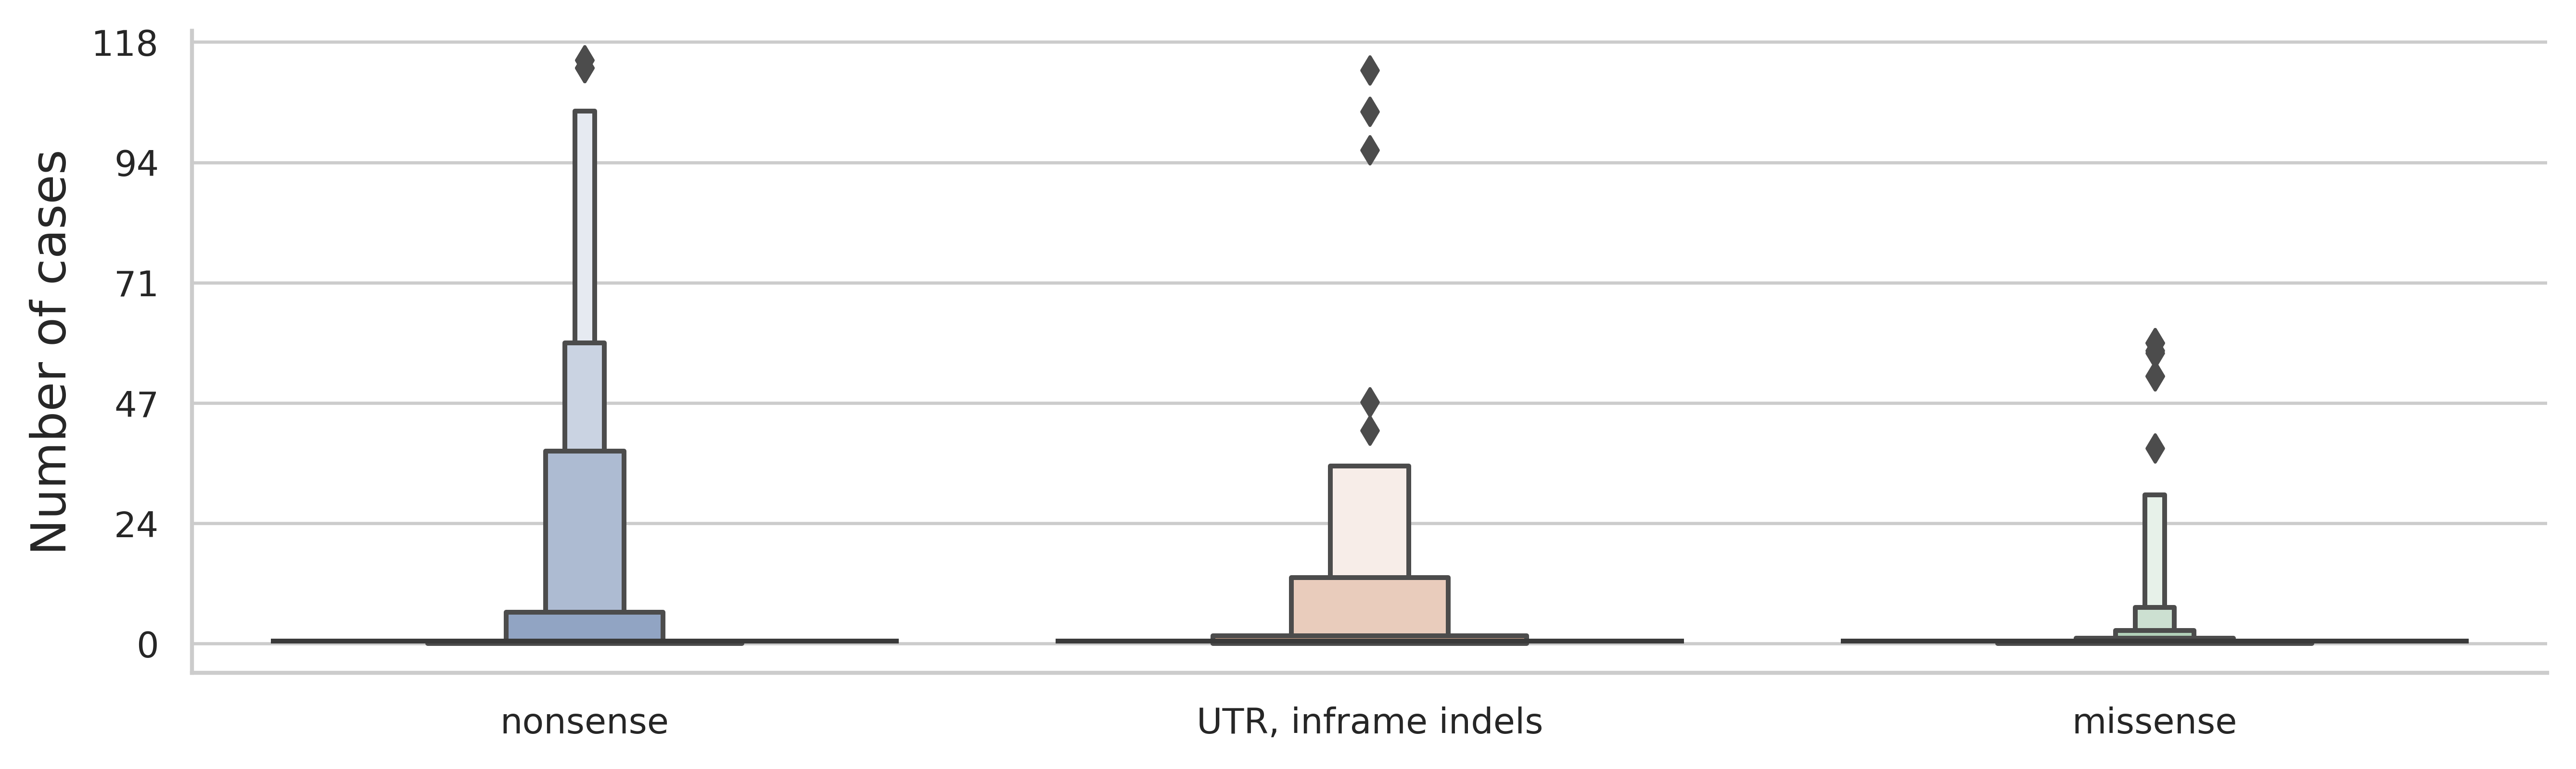

In [52]:
# boxen plots
mpl.rcParams['figure.dpi'] = 600
sns.set_theme(context='paper', style='whitegrid', palette='deep')
sns.set_context("paper", rc={"font.size":10.5,"axes.titlesize":14,"axes.labelsize":12, "title.size":16}) 

g = sns.catplot(
    kind='boxen',
    data=sig_nont,
    x='consequence_analysis',
    y='cases',
    height=3,
    aspect=3
    # hue='maf_analysis',
)


for ax in g.axes.flat:
    ax.set_xlabel('', y=-1.05)
    ax.set_ylabel('Number of cases',  x=-1.05)
    ax.set_yticklabels([str(int(round(float(i) * 118, 0))) for i in ax.get_yticks()])